### <center>Exploratory Data Analysis (EDA) Python code - Medals Project</center>
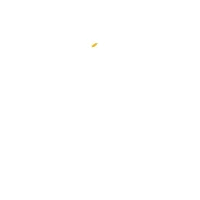  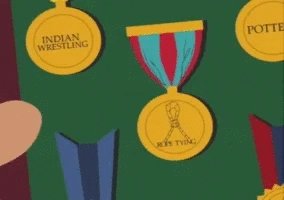

### Step-1: Read Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import *  
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings  
from plotnine import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set Display parameters
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
# Set Working directory
os.chdir(r'C:\Backup\PYTHON_PROJECT_2020\Medals_EDA_Project\Raw_Data')

In [4]:
# Get List of files in working directory 
os.listdir()

['country_attributes_mapping.xlsx', 'medal.csv']

### Step-2: Read Datasets

In [6]:
# Read data into Python 
medal_data = pd.read_csv("medal.csv", header=0, delimiter=',',verbose=True, skiprows=0)
medal_data.head(5)  

Tokenization took: 36.93 ms
Type conversion took: 19.95 ms
Parser memory cleanup took: 0.00 ms


City  Edition     Sport Discipline             Athlete  NOC Gender                       Event Event_gender   Medal
0  Athens     1896  Aquatics   Swimming       HAJOS, Alfred  HUN    Men              100m freestyle            M    Gold
1  Athens     1896  Aquatics   Swimming    HERSCHMANN, Otto  AUT    Men              100m freestyle            M  Silver
2  Athens     1896  Aquatics   Swimming   DRIVAS, Dimitrios  GRE    Men  100m freestyle for sailors            M  Bronze
3  Athens     1896  Aquatics   Swimming  MALOKINIS, Ioannis  GRE    Men  100m freestyle for sailors            M    Gold
4  Athens     1896  Aquatics   Swimming  CHASAPIS, Spiridon  GRE    Men  100m freestyle for sailors            M  Silver

In [7]:
# Read Country attributes 

# Leverage various sources to pull different attributes for each country 

# Country Name: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD
# Country Region, Income group:https://data.worldbank.org/
# Country Population: https://countrycode.org/
# Country GDP: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_sector_composition
# Just to mention that country gdp is reported in USD million    

mapping= pd.read_excel("country_attributes_mapping.xlsx",header=0)    
mapping.head(5)  

country_name iso_code country_code  population_size  area_in_kms                      region         income_group  gdp_usd_mm
0     Afghanistan      AF           AFG         29121286       647500                  South Asia           Low income       69450
1         Albania      AL           ALB          2986952        28748       Europe & Central Asia  Upper middle income       36010
2         Algeria      DZ           DZA         34586184      2381740  Middle East & North Africa  Upper middle income      630000
3  American Samoa      AS           ASM            57881          199         East Asia & Pacific  Upper middle income         658
4         Andorra      AD           AND            84000          468       Europe & Central Asia          High income        3327

In [8]:
mapping.isnull().sum()

country_name       0
iso_code           0
country_code       0
population_size    0
area_in_kms        0
region             0
income_group       0
gdp_usd_mm         0
dtype: int64

In [9]:
medal_data_1=pd.merge(medal_data, mapping, how='left', left_on='NOC', right_on='country_code',
left_index=False, right_index=False, sort=True)

In [10]:
print(medal_data.shape)
print(mapping.shape)
print(medal_data_1.shape)

(29216, 10)
(301, 8)
(29854, 18)


In [11]:
# check for missing values 
print(medal_data.isnull().values.any())
print('')
print(medal_data.isnull().sum())

False

City            0
Edition         0
Sport           0
Discipline      0
Athlete         0
NOC             0
Gender          0
Event           0
Event_gender    0
Medal           0
dtype: int64


In [12]:
# Check to see if there are any missing GDP records 
missing_gdp=pd.isnull(medal_data_1['gdp_usd_mm'])  
medal_data_1[missing_gdp].head(10)

# no missing records 

Empty DataFrame
Columns: [City, Edition, Sport, Discipline, Athlete, NOC, Gender, Event, Event_gender, Medal, country_name, iso_code, country_code, population_size, area_in_kms, region, income_group, gdp_usd_mm]
Index: []

In [13]:
# Check data types for each variable 
medal_data_1.info()
#medal_data_1.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29854 entries, 0 to 29853
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             29854 non-null  object
 1   Edition          29854 non-null  int64 
 2   Sport            29854 non-null  object
 3   Discipline       29854 non-null  object
 4   Athlete          29854 non-null  object
 5   NOC              29854 non-null  object
 6   Gender           29854 non-null  object
 7   Event            29854 non-null  object
 8   Event_gender     29854 non-null  object
 9   Medal            29854 non-null  object
 10  country_name     29854 non-null  object
 11  iso_code         29854 non-null  object
 12  country_code     29854 non-null  object
 13  population_size  29854 non-null  int64 
 14  area_in_kms      29854 non-null  int64 
 15  region           29854 non-null  object
 16  income_group     29854 non-null  object
 17  gdp_usd_mm       29854 non-null

In [15]:
medal_data_1.head(3)

City  Edition      Sport Discipline           Athlete  NOC Gender                Event Event_gender   Medal country_name iso_code country_code  population_size  area_in_kms                      region         income_group  gdp_usd_mm
0      Beijing     2008  Taekwondo  Taekwondo  NIKPAI, Rohullah  AFG    Men              - 58 kg            M  Bronze  Afghanistan      AF           AFG         29121286       647500                  South Asia           Low income       69450
1        Seoul     1988    Sailing    Sailing   BOERSMA, Jan D.  AHO    Men  board (division II)            M  Silver  Netherlands      NA           AHO         16645000        41526       Europe & Central Asia          High income      924400
2  Los Angeles     1984     Boxing     Boxing    ZAOUI, Mohamed  ALG    Men              71-75kg            M  Bronze      Algeria      NA           ALG         34586184      2381740  Middle East & North Africa  Upper middle income      630000

In [16]:
# Make a copy of original data
data=medal_data_1.copy()
data.shape 

(29854, 18)

In [17]:
list(data.columns)

['City',
 'Edition',
 'Sport',
 'Discipline',
 'Athlete',
 'NOC',
 'Gender',
 'Event',
 'Event_gender',
 'Medal',
 'country_name',
 'iso_code',
 'country_code',
 'population_size',
 'area_in_kms',
 'region',
 'income_group',
 'gdp_usd_mm']

### Step-3: Data Wrangling activities 

In [18]:
# Rename columns to make it more readable  
data.rename(columns={'Edition': 'Edition_Year'}, inplace=True)
data.rename(columns={'Athlete': 'Athlete_Name'}, inplace=True)
data.rename(columns={'NOC': 'Country_Code'}, inplace=True)
data.rename(columns={'Medal': 'Medal_Category'}, inplace=True)  

In [19]:
# Check for duplicate values 
data.count() 

# duplicate_rows_df = df[df.duplicated()]
# df = df.drop_duplicates()

City               29854
Edition_Year       29854
Sport              29854
Discipline         29854
Athlete_Name       29854
Country_Code       29854
Gender             29854
Event              29854
Event_gender       29854
Medal_Category     29854
country_name       29854
iso_code           29854
country_code       29854
population_size    29854
area_in_kms        29854
region             29854
income_group       29854
gdp_usd_mm         29854
dtype: int64

In [21]:
# Convert Athlete names values to proper case   
#   data['Athlete_Name'] = data['athlete_Name'].map(lambda x: x if type(x)!=str else x.title())

In [22]:
# lower the case of column names 
data.columns = map(str.lower, data.columns)  
print(list(data.columns))

['city', 'edition_year', 'sport', 'discipline', 'athlete_name', 'country_code', 'gender', 'event', 'event_gender', 'medal_category', 'country_name', 'iso_code', 'country_code', 'population_size', 'area_in_kms', 'region', 'income_group', 'gdp_usd_mm']


In [23]:
# Looking at the overall picture in terms of occurrence 
data.mode(axis=0)  

city  edition_year     sport discipline   athlete_name country_code gender     event event_gender medal_category   country_name iso_code country_code  population_size  area_in_kms                 region income_group  gdp_usd_mm
0  Athens          2000  Aquatics  Athletics  NEMOV, Alexei          USA    Men  football            M           Gold  United States      NA           USA        310232863      9629091  Europe & Central Asia  High income    19490000

### Step-4: Univariate analysis

In [24]:
data.columns  

Index(['city', 'edition_year', 'sport', 'discipline', 'athlete_name', 'country_code', 'gender', 'event', 'event_gender', 'medal_category', 'country_name', 'iso_code', 'country_code', 'population_size', 'area_in_kms', 'region', 'income_group', 'gdp_usd_mm'], dtype='object')

In [25]:
### Looking at the top notch sports and prominent country categories
print(data['sport'].value_counts(normalize=True,sort=True, ascending=False).nlargest(10))
print('')
print(data['country_name'].value_counts(normalize=True,sort=True, ascending=False).nlargest(10))

Aquatics      0.132411
Athletics     0.118276
Rowing        0.085081
Gymnastics    0.077109
Fencing       0.053192
Football      0.046459
Hockey        0.044383
Wrestling     0.039425
Shooting      0.037884
Sailing       0.035640
Name: sport, dtype: float64

United States     0.154083
Russia            0.090574
Germany           0.084612
United Kingdom    0.053393
France            0.044014
Italy             0.041134
Australia         0.036980
Hungary           0.035272
Sweden            0.034200
Netherlands       0.026228
Name: country_name, dtype: float64


##### <font color=brown><i><b><u> Key Insight:- </u></b>
######  * Football, hockey, team competition, basketball were among few of the major games played
######  * US, Russia & Germany were among few of the winning countries
</i> </font>

In [26]:
# Which sports were played during Olympic games?

print((data['sport'].unique())) 
print('')
print(data['sport'].nunique())

['Taekwondo' 'Sailing' 'Boxing' 'Athletics' 'Judo' 'Aquatics' 'Rugby'
 'Tennis' 'Polo' 'Fencing' 'Football' 'Rowing' 'Shooting' 'Weightlifting'
 'Equestrian' 'Volleyball' 'Hockey' 'Basketball' 'Cycling' 'Wrestling'
 'Canoe / Kayak' 'Softball' 'Archery' 'Gymnastics' 'Triathlon' 'Baseball'
 'Handball' 'Tug of War' 'Modern Pentathlon' 'Golf' 'Lacrosse'
 'Ice Hockey' 'Table Tennis' 'Badminton' 'Basque Pelota' 'Skating'
 'Cricket' 'Croquet' 'Water Motorsports' 'Jeu de paume' 'Rackets' 'Roque']

42


###### <font color=brown><b><u> Key Insight:-</u></b><i>  Wide plethora of sports including both water and non-water sports</i></font>

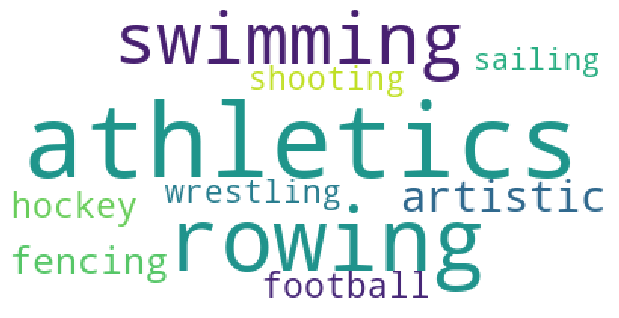

In [27]:
# Which are 10 major disciplines practised during olympics?
from matplotlib.pyplot import figure
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

figure(num=None, figsize=(20, 5), dpi=80, facecolor='w', edgecolor='k')

word_string=" ".join(data['discipline'].str.lower())

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', collocations=False,
                      max_words=10
                         ).generate(word_string)


plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()  


In [28]:
print((data['discipline'].unique())) 
print('')
print(data['discipline'].nunique())

['Taekwondo' 'Sailing' 'Boxing' 'Athletics' 'Judo' 'Swimming' 'Rugby'
 'Tennis' 'Polo' 'Fencing' 'Football' 'Rowing' 'Shooting' 'Weightlifting'
 'Eventing' 'Volleyball' 'Hockey' 'Basketball' 'Cycling Track'
 'Wrestling Free.' 'Wrestling Gre-R' 'Diving' 'Canoe / Kayak F'
 'Cycling Road' 'Canoe / Kayak S' 'Softball' 'Beach volley.' 'Water polo'
 'Archery' 'Trampoline' 'Triathlon' 'Baseball' 'Dressage' 'Handball'
 'Jumping' 'Vaulting' 'Artistic G.' 'Tug of War' 'Mountain Bike'
 'Rhythmic G.' 'Modern Pentath.' 'Golf' 'Lacrosse' 'Ice Hockey'
 'Synchronized S.' 'Table Tennis' 'Badminton' 'Basque Pelota'
 'Figure skating' 'Cricket' 'Croquet' 'Water Motorspor' 'BMX'
 'Jeu de Paume' 'Rackets' 'Roque']

56


###### <font color=brown><b><u> Key Insight:-</u></b><i>  Athletics leads followed by rowing, swimming and football </i></font>

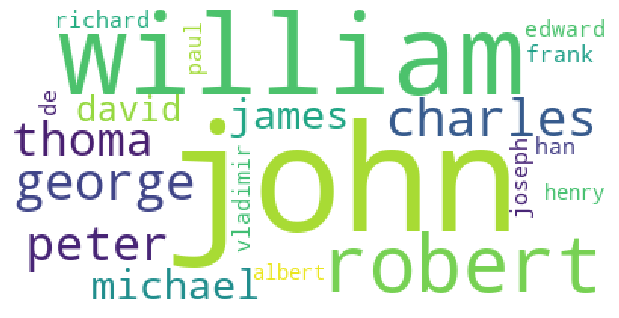

In [29]:
# Which are those players who played most no. of times in Olympics?
figure(num=None, figsize=(20, 5), dpi=80, facecolor='w', edgecolor='k')
word_string=" ".join(data['athlete_name'].str.lower())

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=20
                         ).generate(word_string)

plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()  

###### <font color=brown><b><u> Key Insight:-</u></b><i>  John William, Charles, Robert, James were among few of the most played sport person</i></font>

In [30]:
data.columns

Index(['city', 'edition_year', 'sport', 'discipline', 'athlete_name', 'country_code', 'gender', 'event', 'event_gender', 'medal_category', 'country_name', 'iso_code', 'country_code', 'population_size', 'area_in_kms', 'region', 'income_group', 'gdp_usd_mm'], dtype='object')

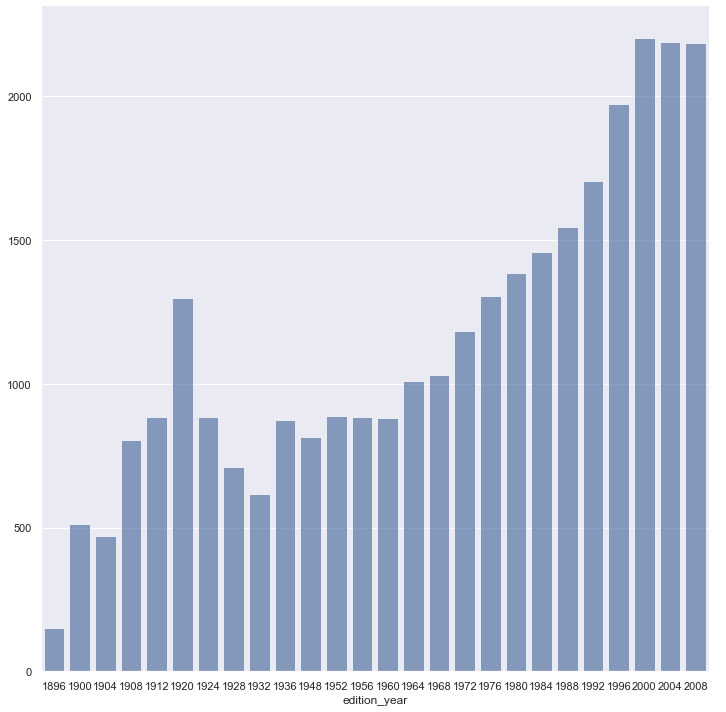

In [31]:
# Which olympic year witnessed most and least winning countries?

g = sns.FacetGrid(data,size=10)
g.map(sns.countplot,'edition_year', alpha=0.7)
g.add_legend()  

###### <font color=brown> <b><u><i> Key Insight:-
  - <i><font color=brown> As per the book "Political Economy of Professional Sport", in 1896 olympics, developing countries productivity was 4 times lower than developed countries.
  - Iceland has never won a Olympic medal
  - Drop in participating countries was observed in 1924 games due to 5 countries (Austria, Bulgaria, Turkey, Hungary and Germany) were banned due to involvement in First world war </font></i>
    </i></u></b> </font>   

In [32]:
# Created a function to produce descriptive statistics, frequency distribution and count plot all at the same time 
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]  
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())
        sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, order = data[y].value_counts().index)
        plt.show()

count      29854
unique        22
top       Athens
freq        2341
Name: city, dtype: object
mode:  0    Athens
dtype: object
Athens                   2341
Sydney                   2203
Beijing                  2185
Los Angeles              2074
Atlanta                  1974
Barcelona                1705
London                   1618
Seoul                    1546
Paris                    1396
Moscow                   1387
Montreal                 1305
Antwerp                  1298
Munich                   1185
Mexico                   1031
Tokyo                    1010
Helsinki                  889
Stockholm                 885
Melbourne / Stockholm     885
Rome                      882
Berlin                    875
Amsterdam                 710
St Louis                  470
Name: city, dtype: int64


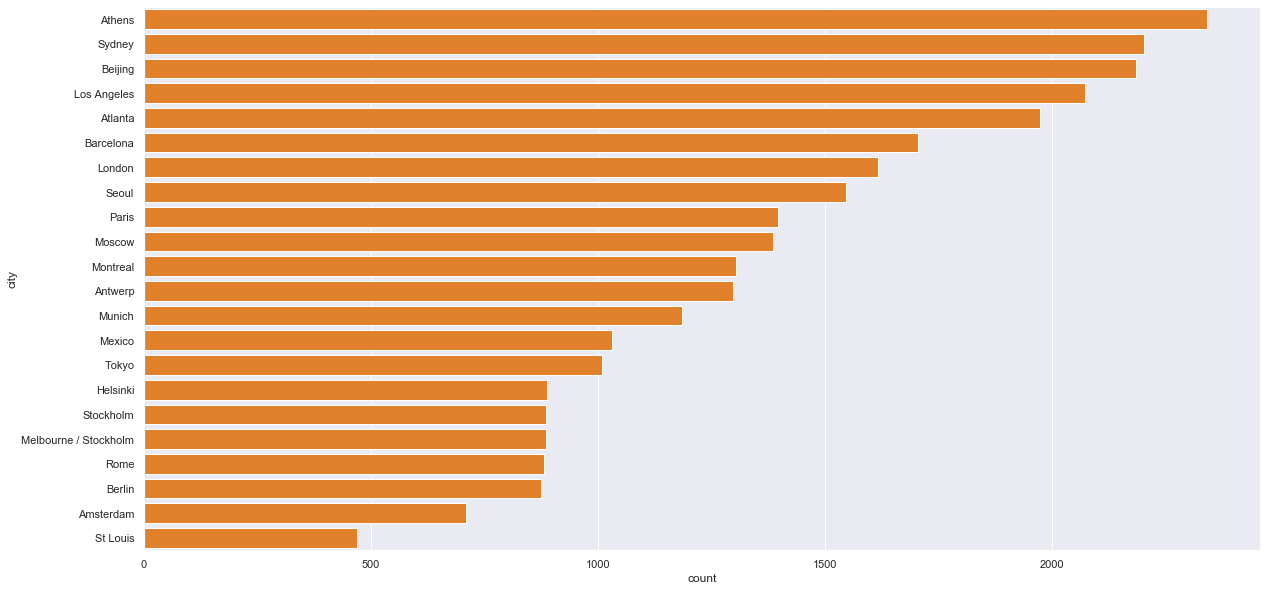

None


In [33]:
sns.set(rc={'figure.figsize':(20,10)})
print(categorical_summarized(data, y = 'city', palette=['tab:orange']))

###### <font color=brown> <b><u><i> Key Insight:-
  - <i><font color=brown> Athens observed winning of maximum no. of models followed by Sydney and Beijing
  - St. Louis and Amsterdam observed lowest models won during any Olympic game </i> <font>
    </i></u></b> </font>       

count    29854.000000
mean      1968.451799
std         32.451023
min       1896.000000
25%       1948.000000
50%       1976.000000
75%       1996.000000
max       2008.000000
Name: edition_year, dtype: float64
mode:  0    2000
dtype: int64
2000    2203
2004    2190
2008    2185
1996    1974
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1912     885
1956     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: edition_year, dtype: int64


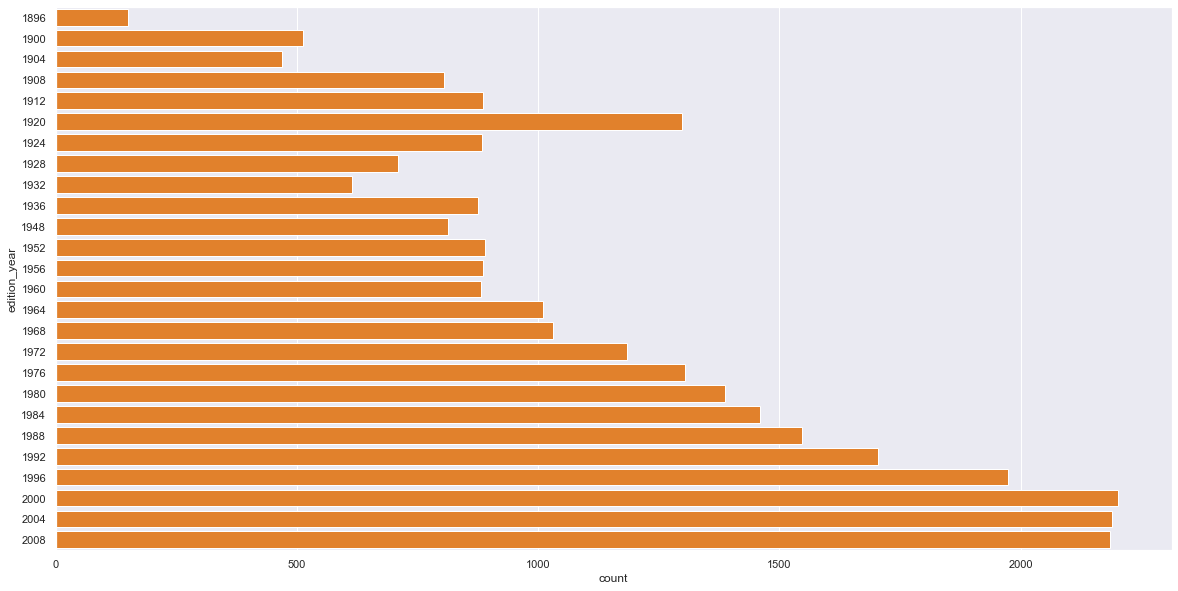

None


In [34]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())
        sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
        plt.show()
        
sns.set(rc={'figure.figsize':(20,10)})
print(categorical_summarized(data, y = 'edition_year', palette=['tab:orange']))

###### <font color=brown> <b><u><i> Key Insight:-
  - <i><font color=brown> In the book "Success and Failure of Countries at the Olympic Games" - Social mobility, income levels and poverty reduction were the among few more critical reasons that determine no of models won because they directly affect the demand for sports as well as technology used to produce world class atheletes  </i> <font>
    </i></u></b> </font>           

count        29854
unique          42
top       Aquatics
freq          3953
Name: sport, dtype: object
mode:  0    Aquatics
dtype: object
Aquatics             3953
Athletics            3531
Rowing               2540
Gymnastics           2302
Fencing              1588
Football             1387
Hockey               1325
Wrestling            1177
Shooting             1131
Sailing              1064
Cycling              1042
Canoe / Kayak        1017
Volleyball            970
Basketball            963
Handball              929
Equestrian            894
Boxing                862
Weightlifting         569
Judo                  443
Baseball              335
Archery               306
Tennis                277
Rugby                 192
Softball              180
Modern Pentathlon     178
Table Tennis          120
Badminton             120
Tug of War             94
Taekwondo              81
Polo                   66
Lacrosse               59
Golf                   30
Ice Hockey             27
Skat

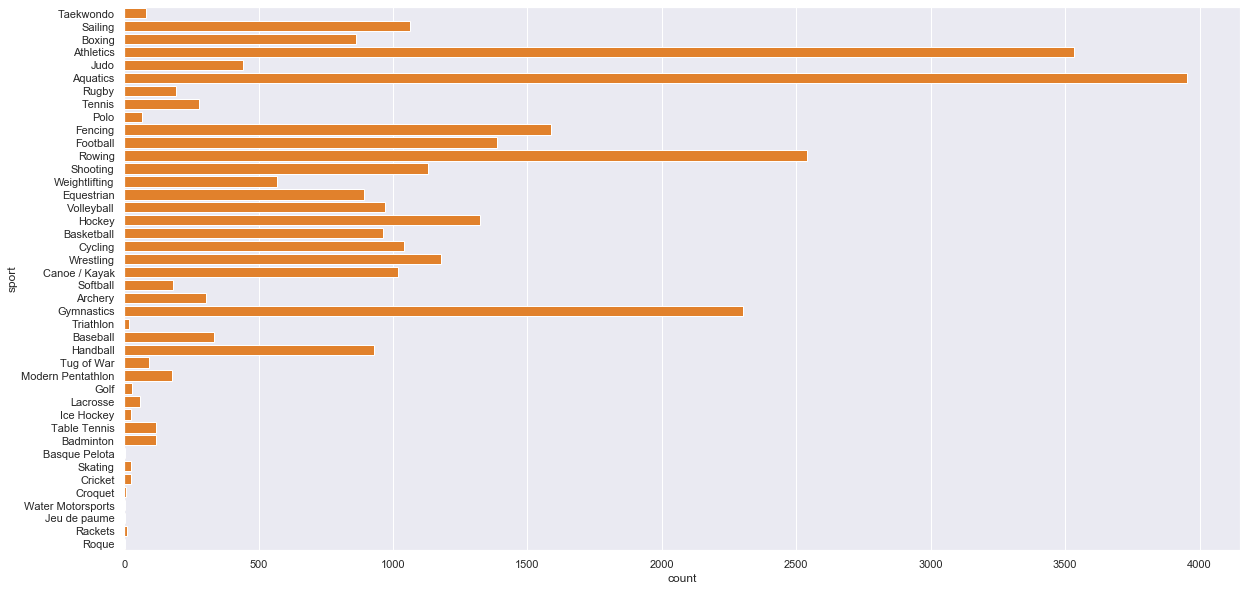

None


In [35]:
sns.set(rc={'figure.figsize':(20,10)})
print(categorical_summarized(data, y = 'sport', palette=['tab:orange']))

###### <font color=brown> <b><u><i> Key Insight:-
  - <i><font color=brown> Cricket was not included after the 1904 Olympics include lack of consistent participation and lack of attention toward it ,</font> </i>
  - <i><font color=brown> Golf had been played just twice in 1900 and 1904. It will resume back in Tokyo Olympics 2020</font> </i> 
  - <i><font color=brown> Aquatics continue to top in the list of sports played in Olympics</font> </i> 
    </i></u></b> </font>           

count         29854
unique           56
top       Athletics
freq           3531
Name: discipline, dtype: object
mode:  0    Athletics
dtype: object
Athletics          3531
Rowing             2540
Swimming           2469
Artistic G.        2158
Fencing            1588
Football           1387
Hockey             1325
Shooting           1131
Sailing            1064
Basketball          963
Handball            929
Canoe / Kayak F     925
Volleyball          922
Water polo          919
Boxing              862
Cycling Track       704
Wrestling Free.     613
Weightlifting       569
Wrestling Gre-R     564
Judo                443
Diving              380
Baseball            335
Eventing            313
Jumping             312
Cycling Road        307
Archery             306
Tennis              277
Dressage            255
Rugby               192
Synchronized S.     185
Softball            180
Modern Pentath.     178
Rhythmic G.         123
Badminton           120
Table Tennis        120
Tug of War  

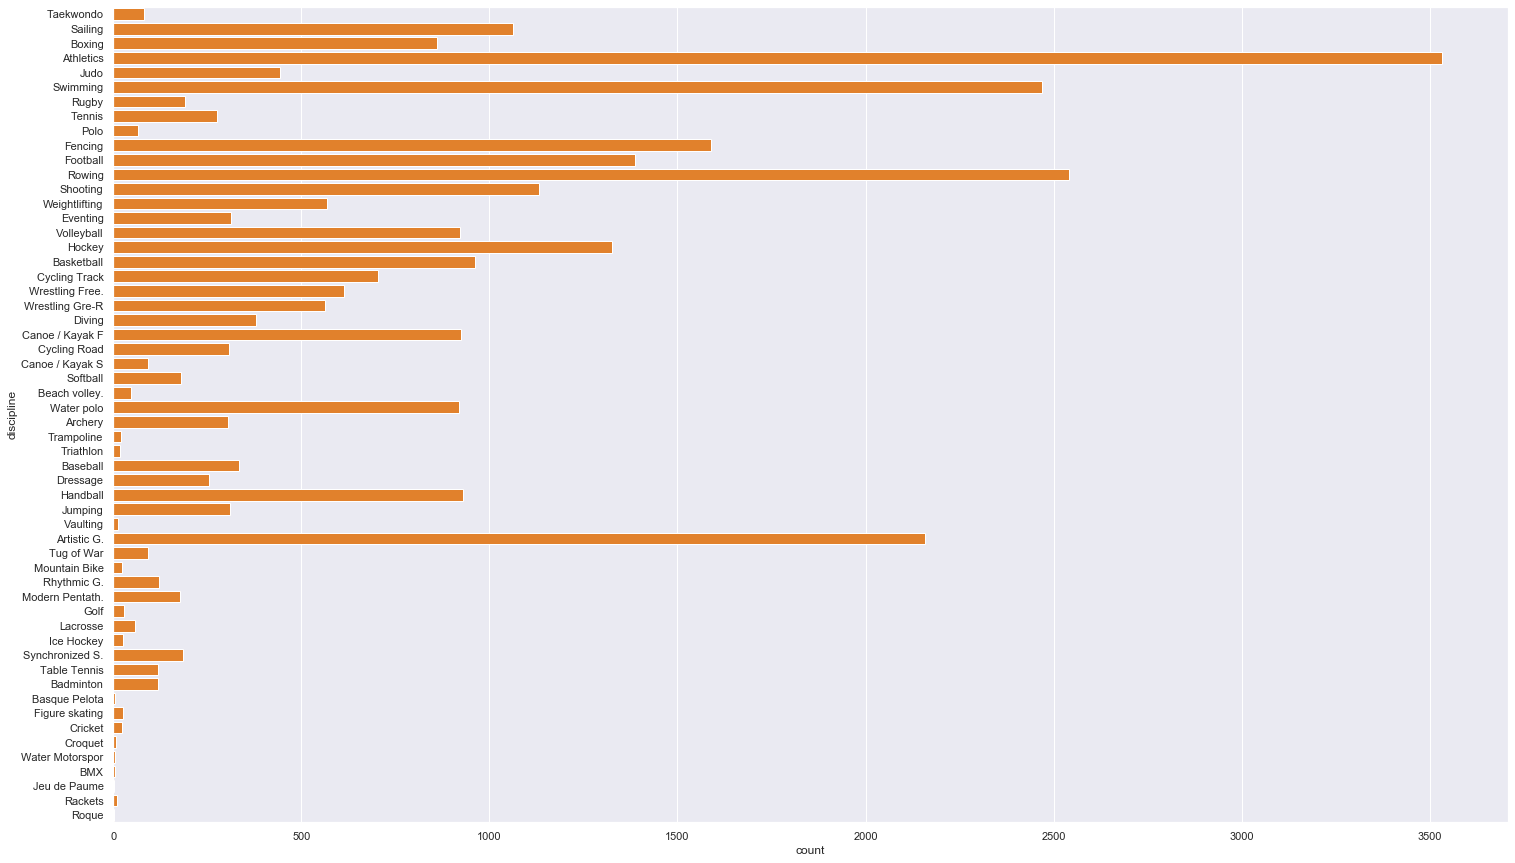

None


In [36]:
sns.set(rc={'figure.figsize':(25,15)})
print(categorical_summarized(data, y = 'discipline', palette=['tab:orange']))

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> As per Statista report: Badminton, Canoeying, Archery and Handball are top least favorite games among Americans </font> </i>
   - <i><font color=brown> Atheletics & Rowing continue to top in the list of sports medals won in Olympics </font>
  </i></u></b> </font>               

count     29854
unique        2
top         Men
freq      22066
Name: gender, dtype: object
mode:  0    Men
dtype: object
Men      22066
Women     7788
Name: gender, dtype: int64


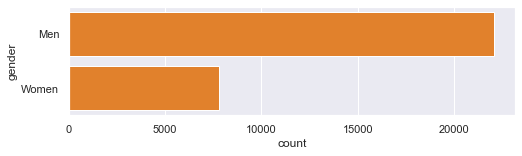

None


In [37]:
# Do the Olympics have a gender gap?

sns.set(rc={'figure.figsize':(8,2)})
print(categorical_summarized(data, y = 'gender', palette=['tab:orange']))

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Fewer female atheletes participants (~35%)  </font> </i>
   - <i><font color=brown> The Olympic Games in 1894 were reserved for male athletes. Women were admitted in 1900 as participants in sports that were considered to be compatible with their femininity and fragility, but were excluded from the showpiece events of track and field </font> </i>
   - <i><font color=brown>  it took until the 1976 Montreal Games before women's participation rose above 20% </font> </i>
   - <i><font color=brown> Hélène de Pourtalès of Switzerland became the first woman to compete at the Olympic Games and became the first female Olympic champion </font>
   - <i><font color=brown>  https://en.wikipedia.org/wiki/Participation_of_women_in_the_Olympics </font> </i>                  
  </i></u></b> </font>               

count     29854
unique        3
top        Gold
freq      10042
Name: medal_category, dtype: object
mode:  0    Gold
dtype: object
Gold      10042
Bronze     9929
Silver     9883
Name: medal_category, dtype: int64


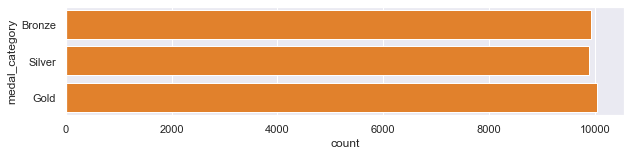

None


In [38]:
# Medal types awarded to winners, first runner-up & second runner-up

sns.set(rc={'figure.figsize':(10,2)})
print(categorical_summarized(data, y = 'medal_category', palette=['tab:orange']))

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Fewer Bronze Silver medals distributed compared to Gold medals</font> </i>
  </i></u></b> </font>               

count             29854
unique              126
top       United States
freq               4600
Name: country_name, dtype: object
mode:  0    United States
dtype: object
United States           4600
Russia                  2704
Germany                 2526
United Kingdom          1594
France                  1314
Italy                   1228
Australia               1104
Hungary                 1053
Sweden                  1021
Netherlands              783
China                    712
Japan                    704
Soviet Union             638
Romania                  624
Canada                   592
Norway                   537
Poland                   499
Denmark                  491
South Korea              466
Finland                  451
Yugoslavia               435
Belgium                  408
Cuba                     395
Spain                    377
Switzerland              376
Brazil                   372
Bulgaria                 331
Czechoslovakia           329
Argentina         

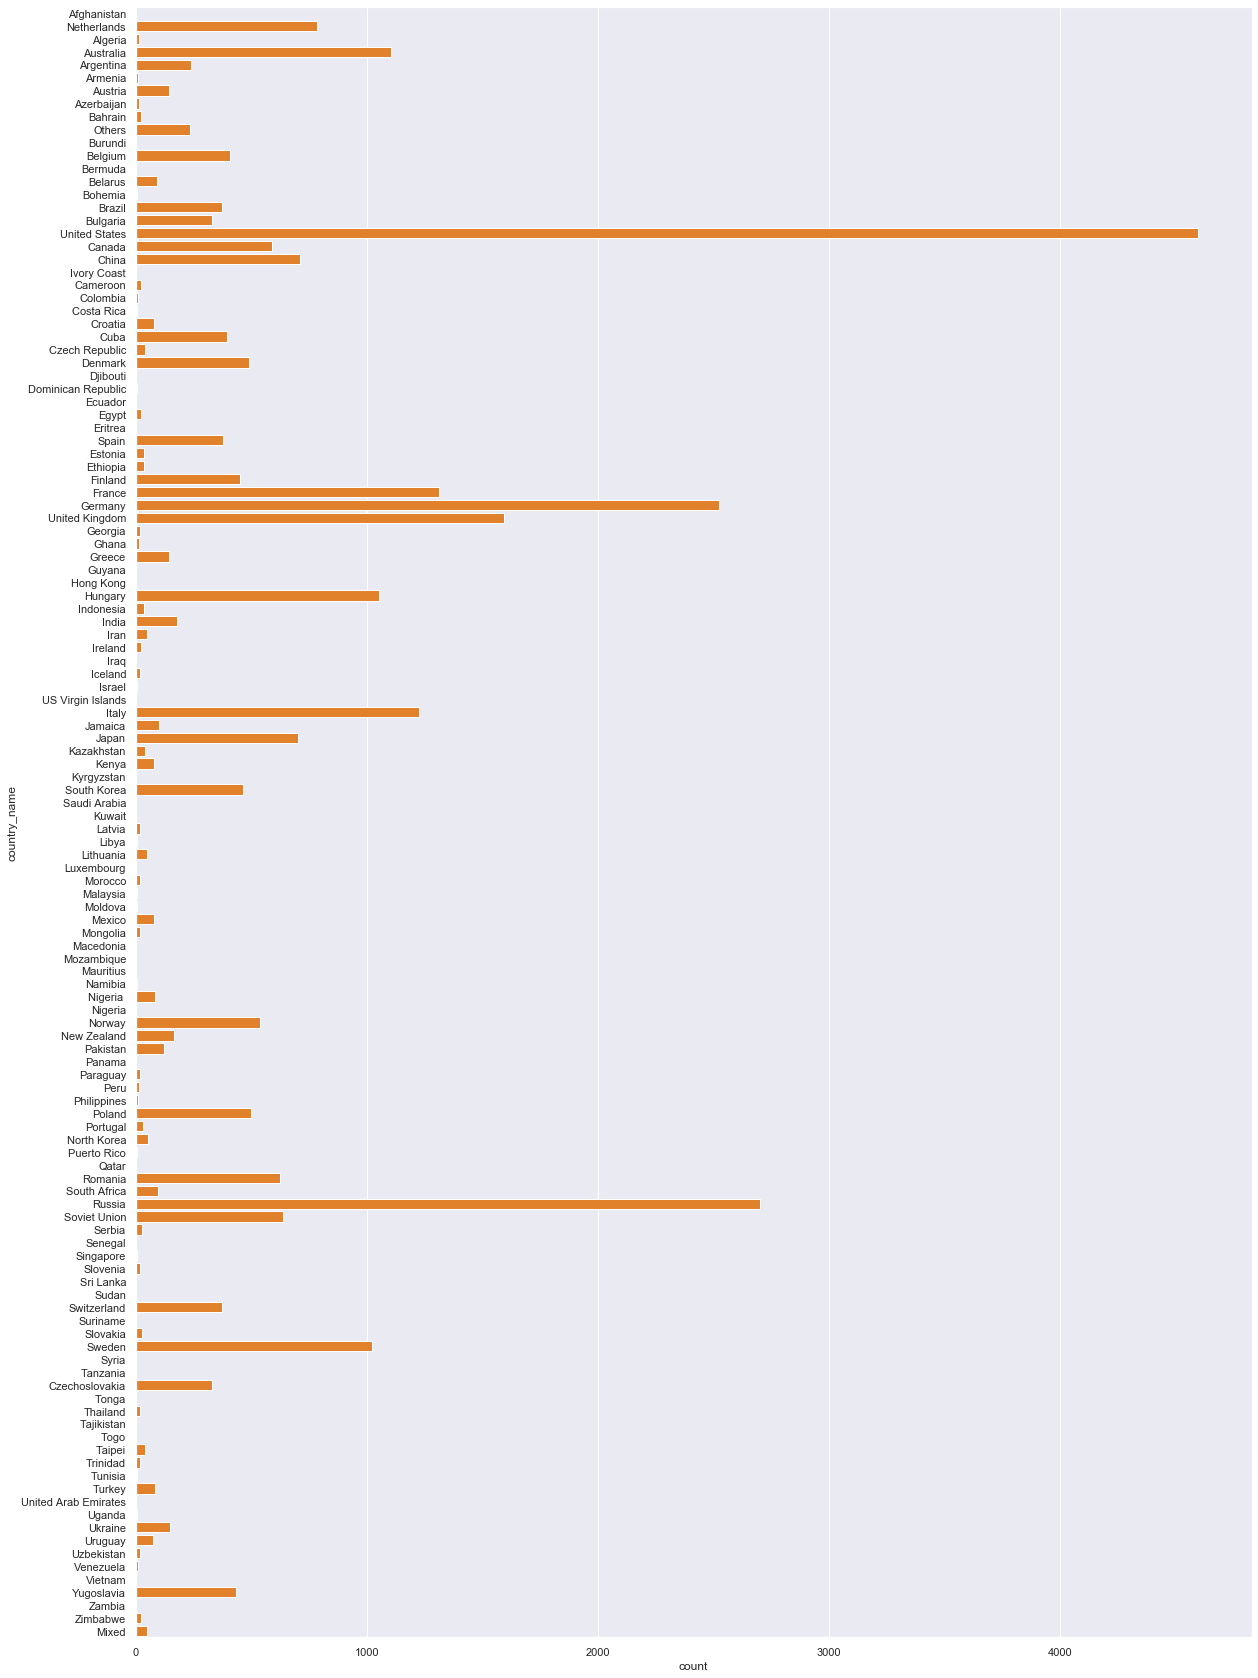

None


In [39]:
# Which country won the most no of medals?
sns.set(rc={'figure.figsize':(20,30)})
print(categorical_summarized(data, y = 'country_name', palette=['tab:orange']))

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> US, Germany, UK tops the most received medals countries </font> </i>
  </i></u></b> </font>               

count                     29854
unique                        8
top       Europe & Central Asia
freq                      18056
Name: region, dtype: object
mode:  0    Europe & Central Asia
dtype: object
Europe & Central Asia         18056
North America                  5193
East Asia & Pacific            3302
Latin America & Caribbean      1340
unknown                        1201
South Asia                      302
Sub-Saharan Africa              301
Middle East & North Africa      159
Name: region, dtype: int64


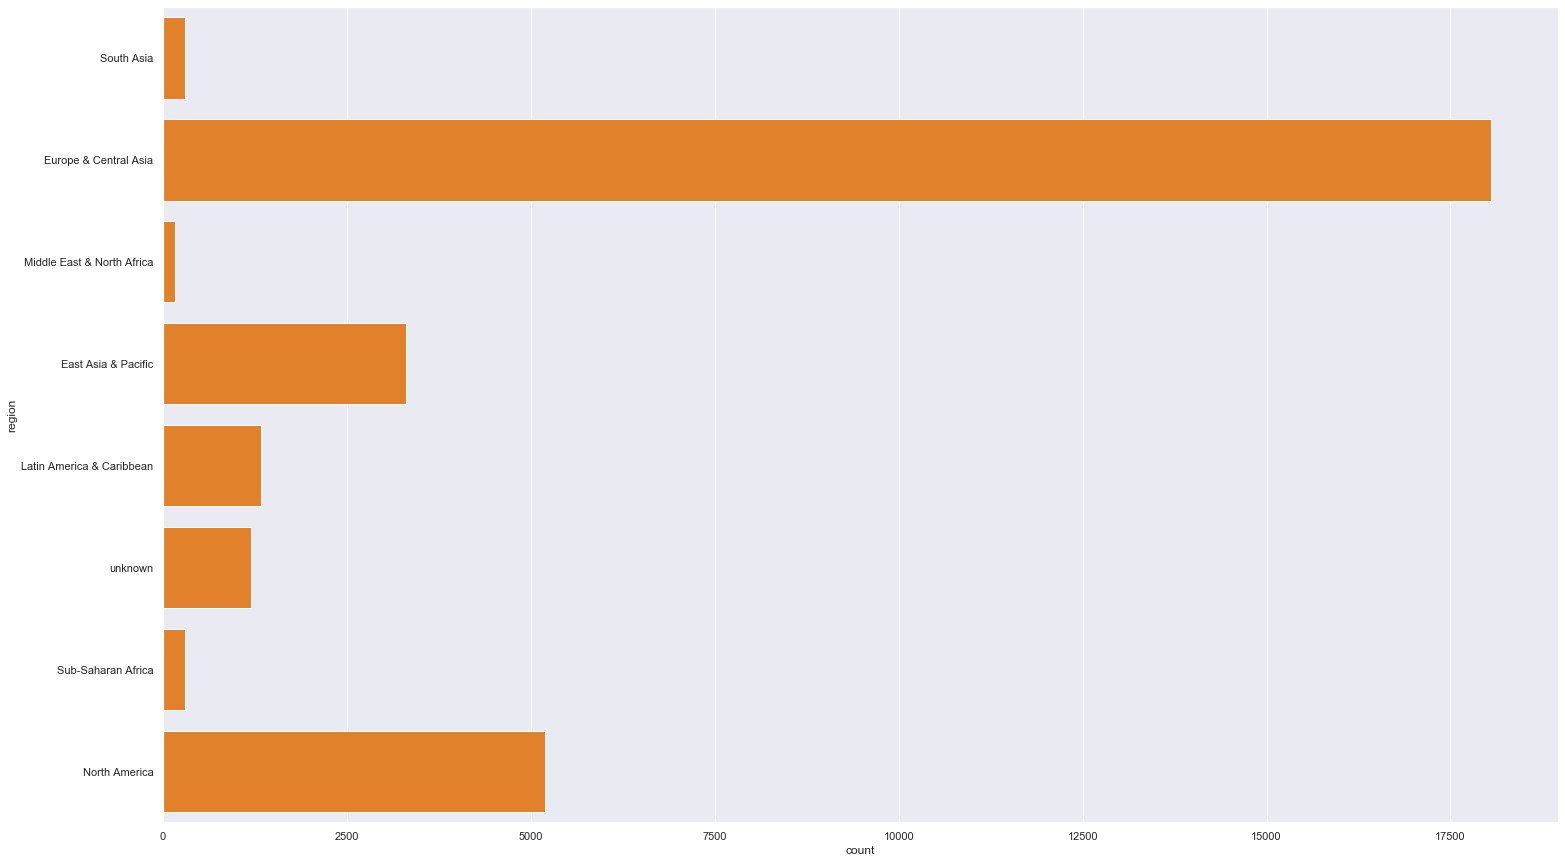

None


In [40]:
# Which regions received most medals?
sns.set(rc={'figure.figsize':(25,15)})
data['region'].replace({'unknown': 'Others'}, inplace=True)
print(categorical_summarized(data, y = 'region', palette=['tab:orange']))

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> US, Europe & East Asia tops the regions which received most medals</font> </i>
  </i></u></b> </font>               

count           29854
unique              5
top       High income
freq            21056
Name: income_group, dtype: object
mode:  0    High income
dtype: object
High income            21056
Upper middle income     6749
unknown                 1201
Lower middle income      739
Low income               109
Name: income_group, dtype: int64


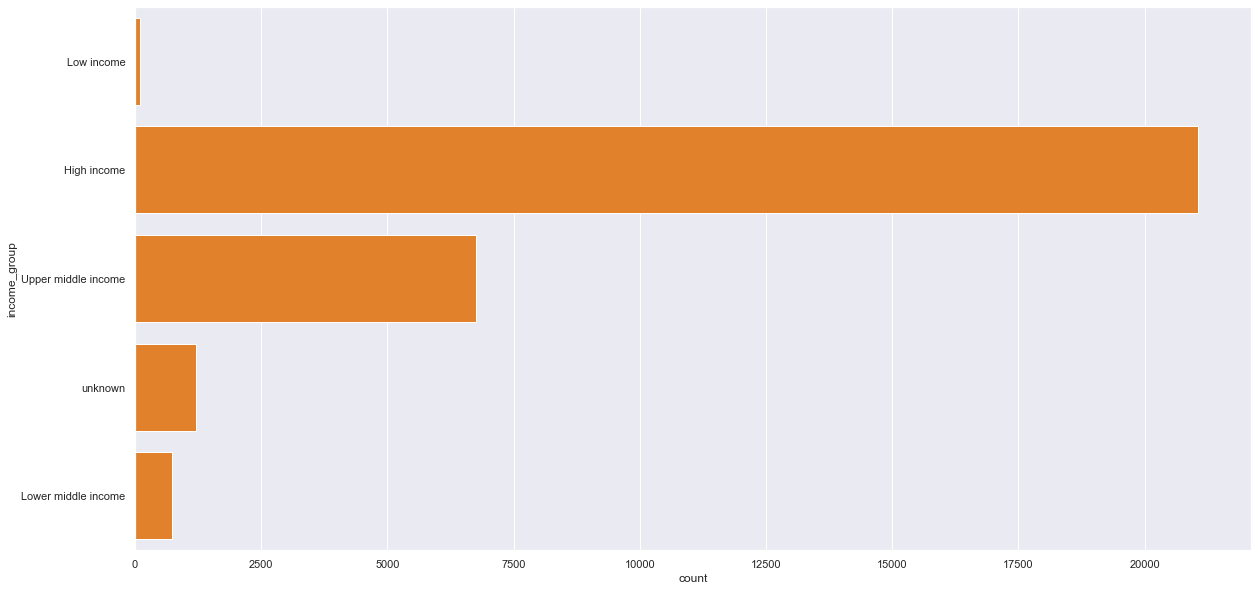

None


In [41]:
# Does richer countries won more medals?
sns.set(rc={'figure.figsize':(20,10)})
data['income_group'].replace({'unknown': 'Others'}, inplace=True)
print(categorical_summarized(data, y = 'income_group', palette=['tab:orange']))

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Yes, countries with richer economies won more models </font> </i>
  </i></u></b> </font>               

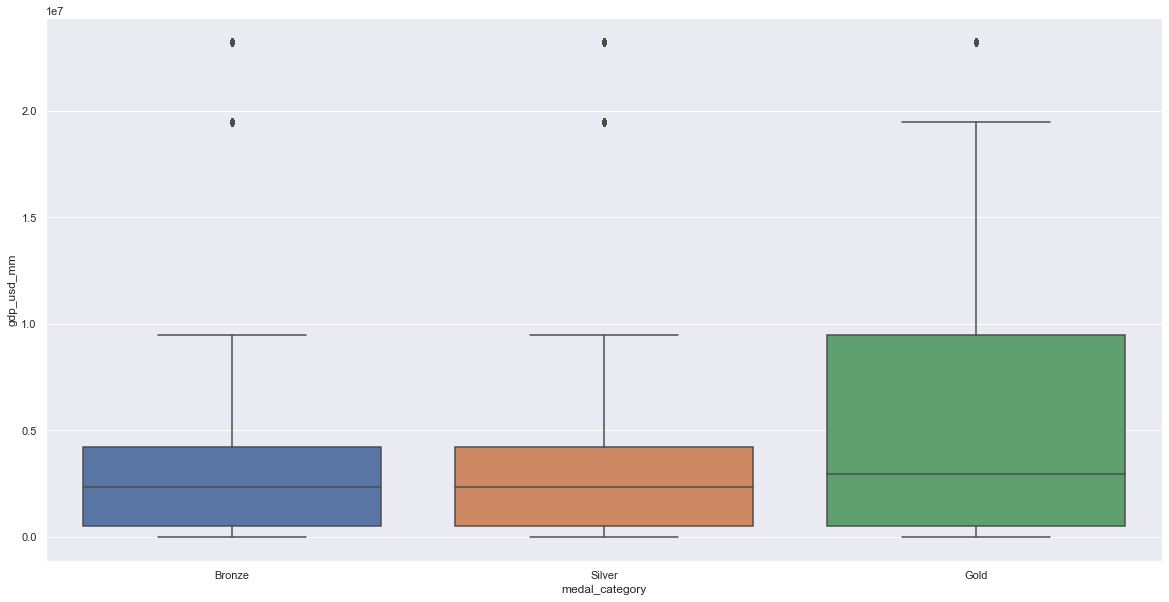

In [42]:
# Does Gold winning nations have a stronger GDP?
sns.set(rc={'figure.figsize':(20,10)})
sorted_nb = data.groupby(['medal_category'])['gdp_usd_mm'].median().sort_values()
sns.boxplot(x=data['medal_category'], y=data['gdp_usd_mm'], order=list(sorted_nb.index))

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Stronger economy countries perform better than those with relatively weaker economies </font> </i>
   - <i><font color=brown> Weaker economies won almost similar no. of silver and bronze medals </font> </i>
  </i></u></b> </font>               

### Step-5: Bivariate analysis

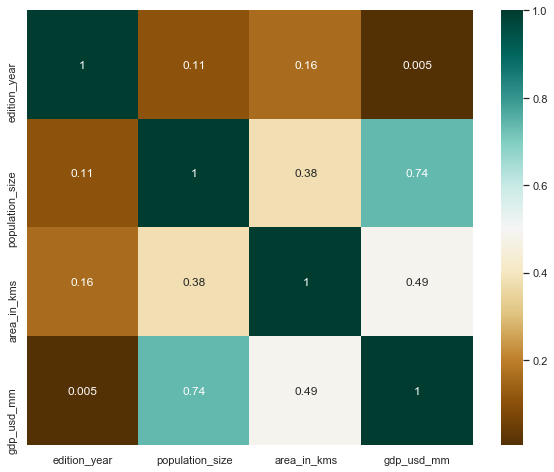

In [43]:
# Is there any correlation in large countries and high performing economies?
plt.figure(figsize=(10,8))
c= data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Larger countries like US, Europe, UK have stronger economies </font> </i>
  </i></u></b> </font>               

In [44]:
# Which country received maximum and minimum medals at overall level?
countrywise_medals_summary2=data.pivot_table(index='country_name',values='medal_category',columns='edition_year',aggfunc='count',fill_value=0)
countrywise_medals_summary2.style.background_gradient(cmap='Purples')

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Since the first Olympic games, US has been quite active in participation </font> </i>
   - <i><font color=brown> During 1920, Belgium, France & Norway were the prominent countries apart from US who actively won awards during games </font> </i>
  </i></u></b> </font>               

In [45]:
# Which country received maximum and minimum gold medals?
countrywise_medals_summary=data.pivot_table(index='country_name',values='gender',columns='medal_category',aggfunc='count',fill_value=0)
countrywise_medals_summary.style.background_gradient(cmap='Greens')

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> US, Russia, Germany received max Gold medals </font> </i>
   - <i><font color=brown> Inspite of the fact that UAE and South Africa are bigger nations, still they won least no. of medals  </font> </i>
  </i></u></b> </font>               

In [46]:
# Which disciplines were played more by females and lesser by males medalists?
import scipy.stats as sps
orange = sns.light_palette("orange", as_cmap=True) # column percentages 
cont1=pd.crosstab(data['discipline'],data['event_gender'],margins=False).style.background_gradient(cmap=orange)
cont1

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Female won more medals than men in Mountain Bike, Rhythemic G & Softball events</font> </i>
   - <i><font color=brown> Female winners won medals more in Swimming, Atheletics & Rowing events</font> </i>
   - <i><font color=brown> Both Male & Female won equally in Table tennis, Badminton & Beach Volleyball</font> </i>
   - <i><font color=brown> Eventing & Jumping are the only major events won by both men and women groups</font> </i>
  </i></u></b> </font>               

In [47]:
# Which regions, income group and gender contributed emensely to gold medal volumes?
import scipy.stats as sps
orange = sns.light_palette("orange", as_cmap=True) # column percentages 
cont1=pd.crosstab(data['region'],data['medal_category'],margins=False).style.background_gradient(cmap=orange)
cont1

In [48]:
cont2=pd.crosstab(data['income_group'],data['medal_category'],margins=False).style.background_gradient(cmap=orange)
cont2

In [49]:
cont3=pd.crosstab(data['gender'],data['medal_category'],margins=True).style.background_gradient(cmap=orange)
cont3

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Most Gold medals were won from US, Europe & East Asia regions</font> </i>
   - <i><font color=brown> Gold winning regions belonged to High & Upper middle income segments </font> </i>
   - <i><font color=brown> Men were the dominating segment in terms of most medals received in Olympics </font> </i>
  </i></u></b> </font>               

In [50]:
# Which sport type are the least difficult & most difficult ones for winning a Gold medal? 
import scipy.stats as sps

orange = sns.light_palette("orange", as_cmap=True)
cont=pd.crosstab(data['medal_category'],data['sport'],margins=False).style.background_gradient(cmap=orange)
#cont.reindex(['Gold','Silver','Bronze'])
cont

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Golf, Swimming, Taekwondo & Skating are considered most difficult form of event to not just win a gold medal but also to qualify </font> </i>
   - <i><font color=brown> Volleyball, Archery & Weightlifting are considered most easiest form of event to get a gold medal</font> </i>
   - <i><font color=brown> Technical mastery, physically challenging & syncronization are the few factors which make these the above sports quite challenging to qualify and win a medal  </font> </i>    
   - <i><font color=brown> Reference link: https://www.foxsports.com/olympics/gallery/olympic-sport-event-easiest-to-win-gold-rio-summer-games-medals-080216  </font> </i>  
  </i></u></b> </font>               

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Fewer Golds are received in more difficult form of sports </font> </i>
  </i></u></b> </font>               

In [57]:
# Identify Data anomaly present in dataset (in case of event gender)
ctab2 = pd.crosstab(data['event_gender'], data['gender'],margins=True).style.background_gradient(cmap=orange)      
ctab2

In [58]:
# Remove false record from data
data.drop(data[((data['event_gender']=='W') & (data['gender']=='Men'))].index, inplace = True)  

In [59]:
data.shape  

(29853, 18)

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> There is one record with a male participating in a female event, which is incorrect </font> </i>
  </i></u></b> </font>               

### Step-6: Adhoc analysis for further deep diving 

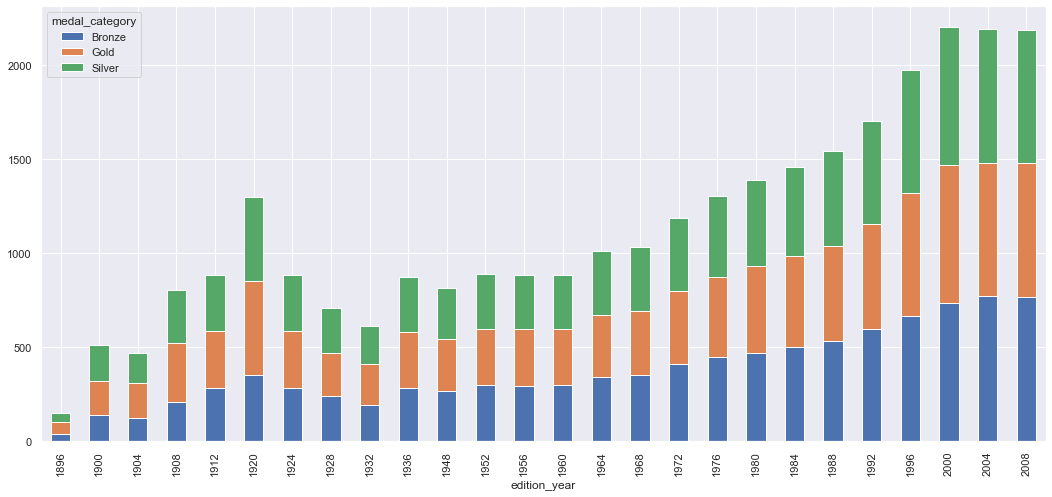

In [61]:
# Is there a trend in gold and silver medals distribution over period of time?
clarity_color_table = pd.crosstab(index=data["edition_year"], 
                          columns=data["medal_category"])

clarity_color_table

clarity_color_table.plot(kind="bar", 
                 figsize=(18,8),
                 stacked=True)

Text(0.5, 1.0, 'Athletes at the Olympic Games by Sex')

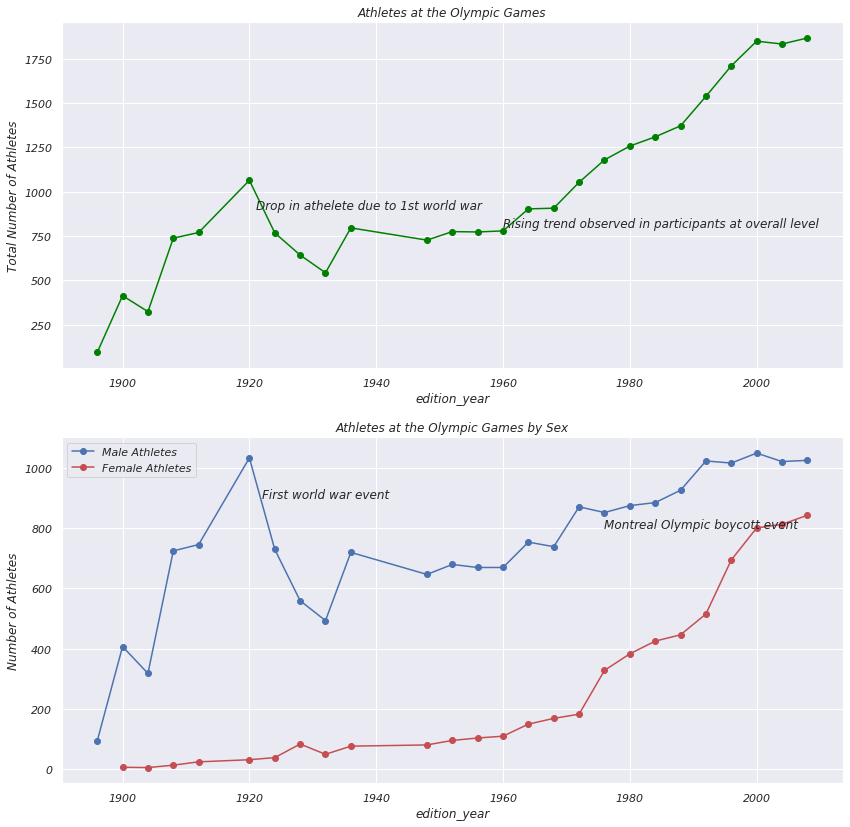

In [205]:
# Is there a upward trend observed in volume of Olympic participants?
import matplotlib.font_manager

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12,
        'style' : 'italic'}

plt.rc('font', **font)

plt.figure(figsize=(14,14))
plt.subplot(2,1,1)
data.groupby('edition_year')['athlete_name'].nunique().plot(color='green',marker='o')
plt.ylabel("Total Number of Athletes")
plt.text(1921,900,'Drop in athelete due to 1st world war')
plt.text(1960,800,'Rising trend observed in participants at overall level')
plt.title("Athletes at the Olympic Games")
plt.subplot(2,1,2)

data.loc[data['gender']=='Men'].groupby('edition_year')['athlete_name'].nunique().plot(color='b',marker='o',label='Male Athletes')
data.loc[data['gender']=='Women'].groupby('edition_year')['athlete_name'].nunique().plot(color='r',marker='o',label='Female Athletes')
plt.ylabel("Number of Athletes")
plt.legend(loc='upper left')
plt.text(1922,900,'First world war event')
plt.text(1976,800,'Montreal Olympic boycott event')
plt.title("Athletes at the Olympic Games by Sex")

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Socio-Economic events like first world war, Montreal boycott contributed to the decline in overall atheletics participating in games and inturn resulted in drop in winner volumes in 1920 and 1980s </font> </i>
  </i></u></b> </font>               

In [62]:
# function for analysing variable distribution across various categorical variables 
def segmented_variate(x, y):
    print('\nNumber of unique values => ' + str(len(data[y].unique())) + '\n\n')
    
    # Create 2 subplots for mean and median respectively
    plt.figure(figsize=(10, 4))
 
    # subplot 1: statistic=mean
    plt.subplot(1, 2, 1)
    sns.barplot(x=x, y=y, data=data)
    plt.title("Mean")
    
    # subplot 2: statistic=median
    plt.subplot(1, 2, 2)
    sns.barplot(x=x, y=y, data=data, estimator=np.median)
    plt.title("Median")
 
    plt.show()


Number of unique values => 116




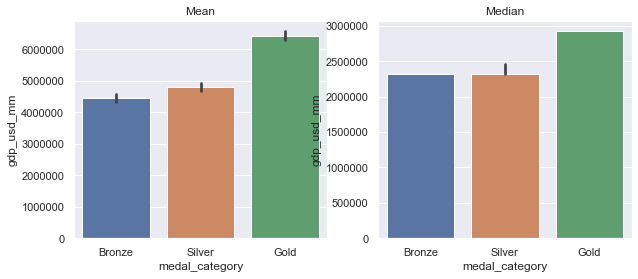

In [63]:
# Does high economies drive better sports performance? (Avg GDP vs Median GDP)
segmented_variate('medal_category', 'gdp_usd_mm')

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Direct positive correlation can be seen between economies of scale and sports performance </font> </i>
  </i></u></b> </font>               


Number of unique values => 116




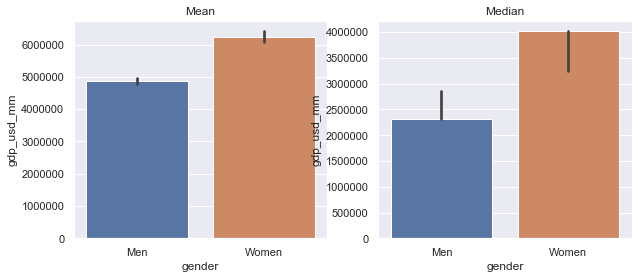

In [64]:
# Did female medalists belonged to more from high economic regions?
segmented_variate('gender', 'gdp_usd_mm')

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Yes, more female medalists belonged to high economic zones </font> </i>
  </i></u></b> </font>               

In [65]:
def bivariate_segmented_categorical(x, hue1, hue2):
    
    plt.figure(figsize=(20, 20))
    x, hue1, hue2 = x, hue1, hue2
    
#     y = "count"
#     count_data = data[x].groupby([data[hue1],data[hue2]]).value_counts().rename(y).reset_index()
#     sns.catplot(x=x, hue = hue1, col = hue2, data = data, kind='count', sharey=False, sharex=False, col_wrap=3)
#     plt.show()
    
    y = "percent(%)"
    percent_data = data[x].groupby([data[hue1],data[hue2]]).value_counts(normalize=True).rename(y).reset_index()
    sns.catplot(x=x, y=y, hue=hue1, col=hue2, data=percent_data, kind='bar', sharey=False, sharex=False, col_wrap=3)
    plt.show()
    #print(tabulate(pd.merge(percent_data, count_data, how='inner'), headers='keys', tablefmt='fancy_grid'))

<Figure size 1800x5760 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

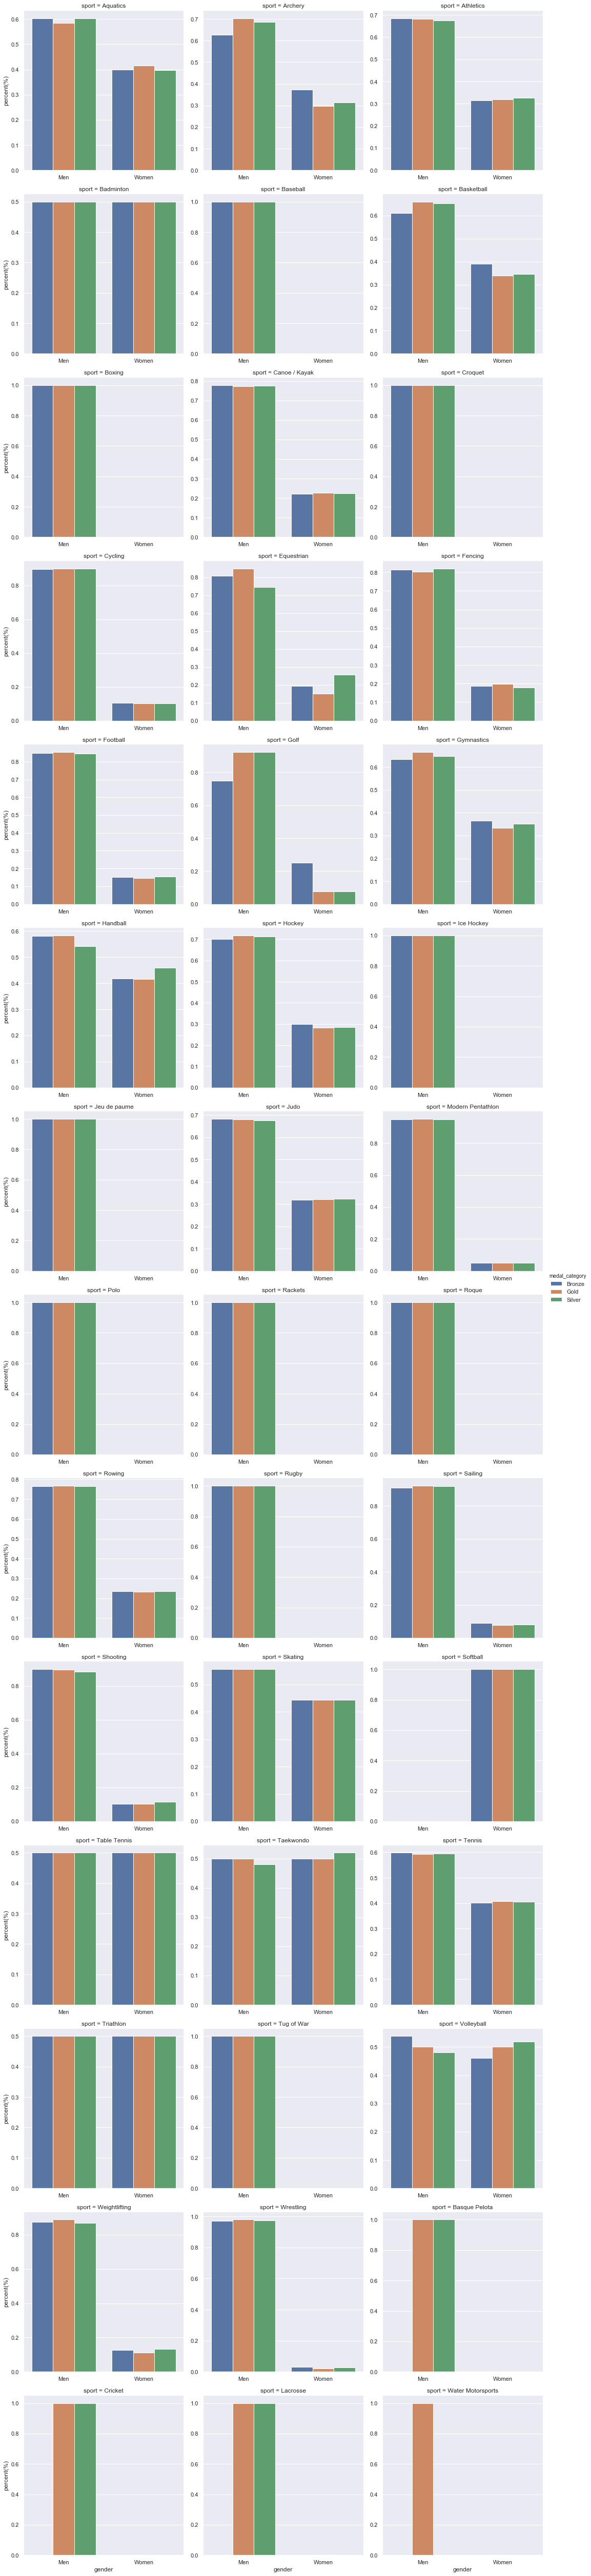

In [66]:
# Across which sports categories did female won Gold medals more than men? 
# Was there any sport activity, where in the female distribution was much wider across medal categories?
# Which sport did not witness any female medalists?

plt.figure(figsize=(25, 80))
bivariate_segmented_categorical("gender", "medal_category", "sport") # medals by gender (one chart for each sport type)

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Tug of war, Basque Pilota & Wrestling were few games where females scored more gold in comparison to males </font> </i>
  </i></u></b> </font>               

<Figure size 1800x5760 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

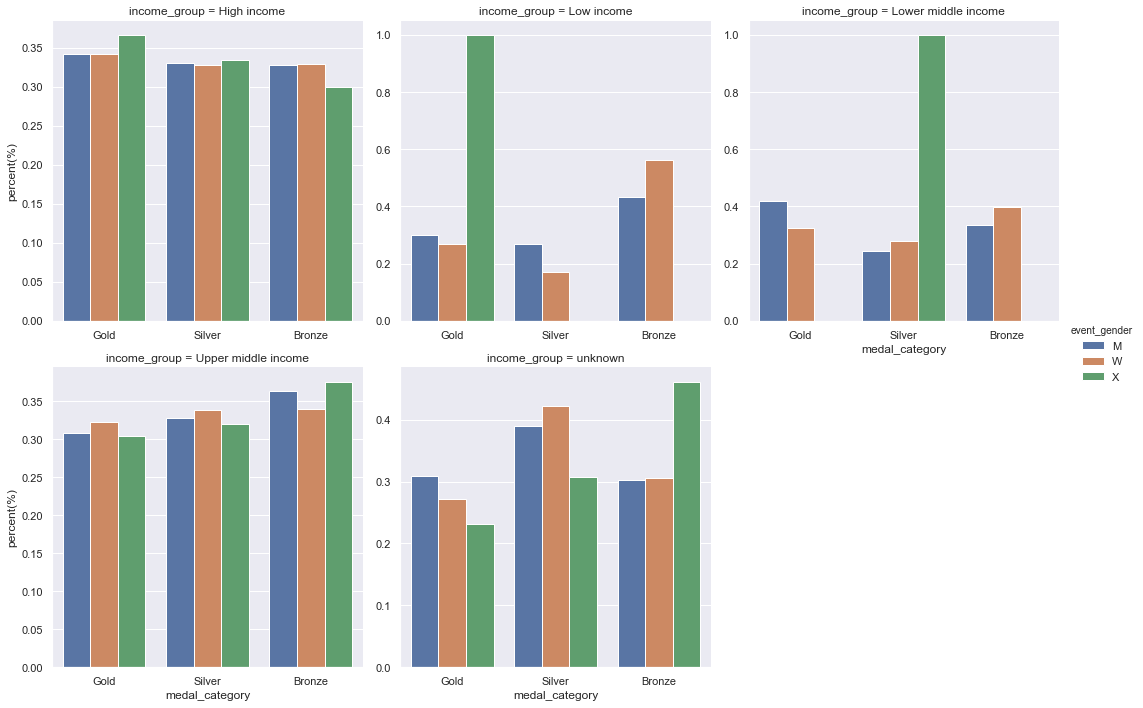

In [68]:
# How did the low & Mid income segment region`s performed?
plt.figure(figsize=(25, 80))
bivariate_segmented_categorical("medal_category", "event_gender", "income_group")

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Low-Mid income athletes performed well in X-Category events</font> </i>
  </i></u></b> </font>               

<Figure size 1440x1440 with 0 Axes>

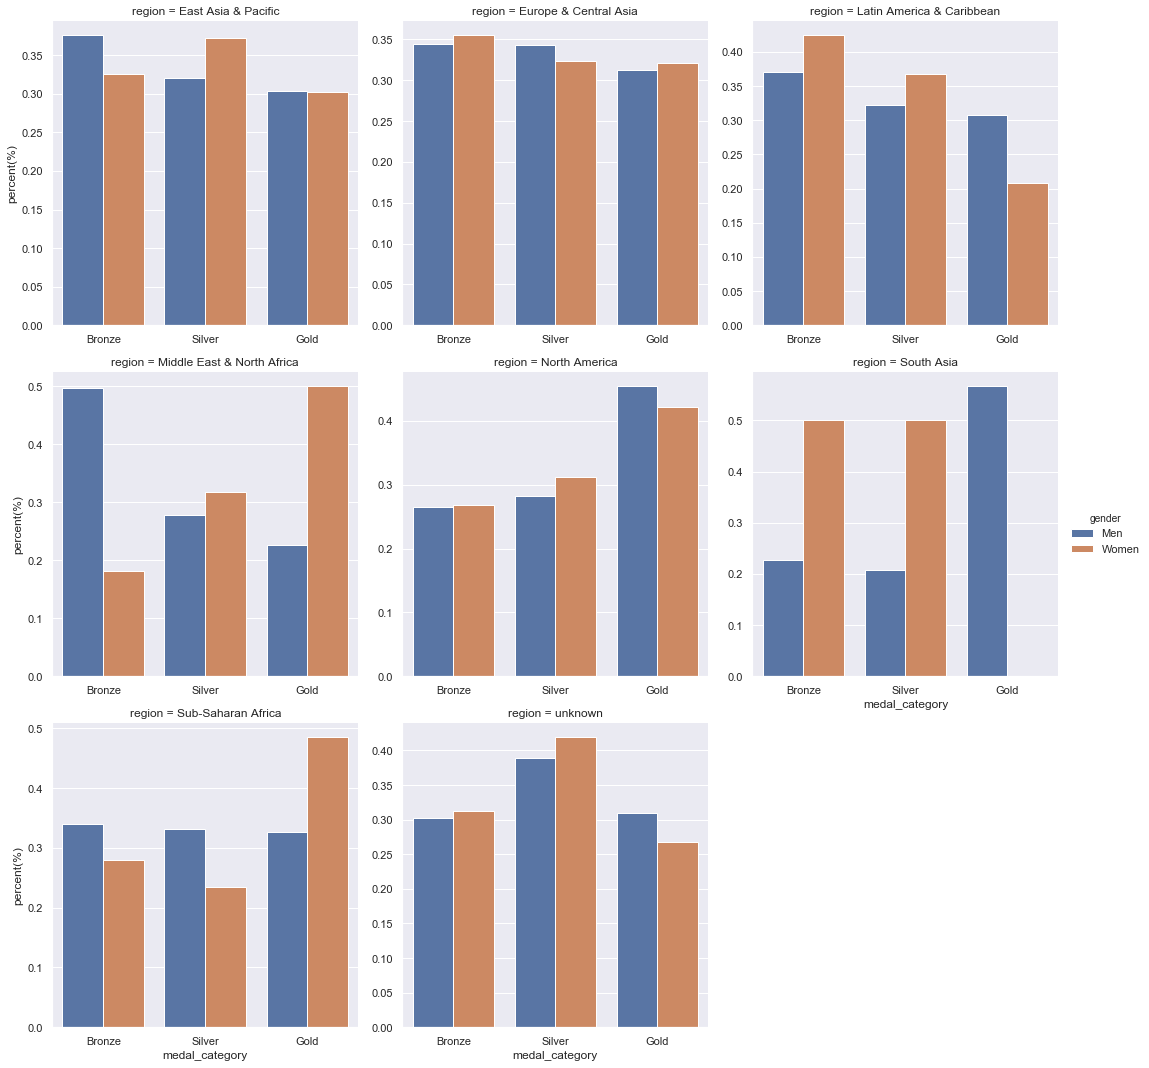

In [69]:
# Which region had nearly equal contribution of both male and female gold medalists? 
# Performed Medals comparison in North America vs South America vs Middle east regions?

bivariate_segmented_categorical("medal_category", "gender", "region")

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Middle-east region has most disproportionate quantity of medalists in terms of their genders   </font> </i>
   - <i><font color=brown> In the Gold category, South America has higher dis-proportion rate compared to US</font> </i>
  </i></u></b> </font>               

<Figure size 1152x432 with 0 Axes>

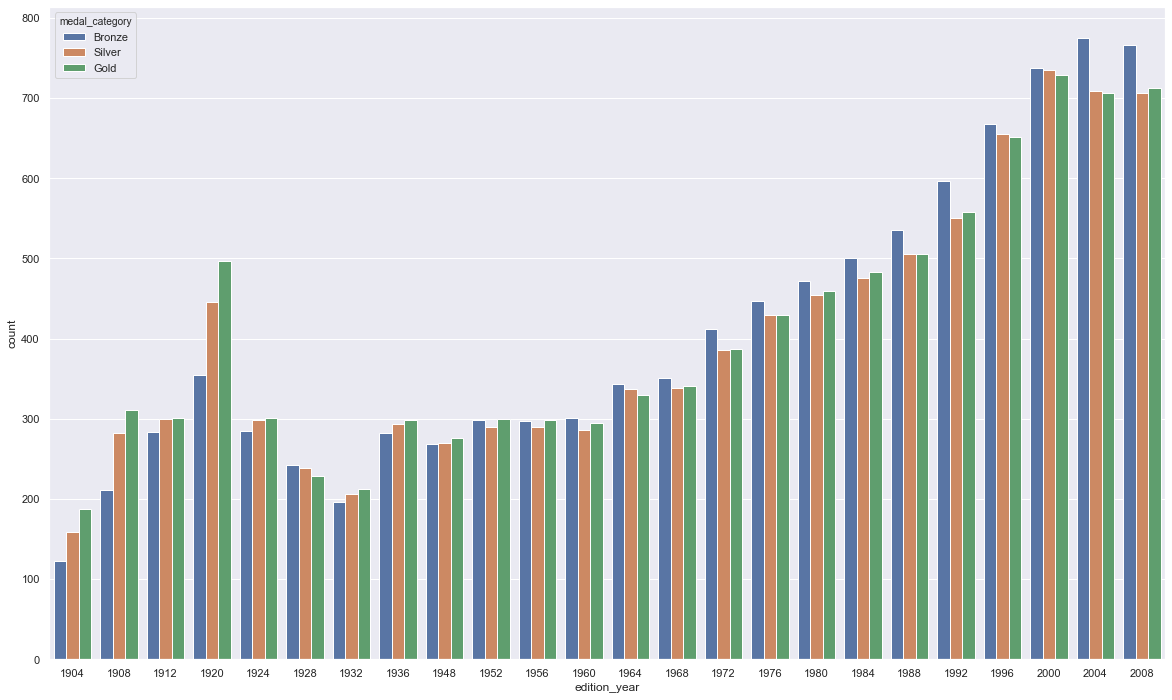

In [198]:
# Is there a trend and seasonality observed in Gold & Silver medals over period of time? Any sharp peaks or troughs?

import seaborn as sns
sns.set(style="darkgrid")
from matplotlib.pyplot import suptitle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure, show
    
# Set the width and height of the figure
plt.figure(figsize=(16,6))

figure(figsize=(20,12))
sns.countplot(data=data[data['edition_year']>1900],x='edition_year', hue="medal_category")
show()

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Following 1960s, surge in Bronze medals is observed in comparison to Gold and Silver categories </font> </i>
  </i></u></b> </font>               

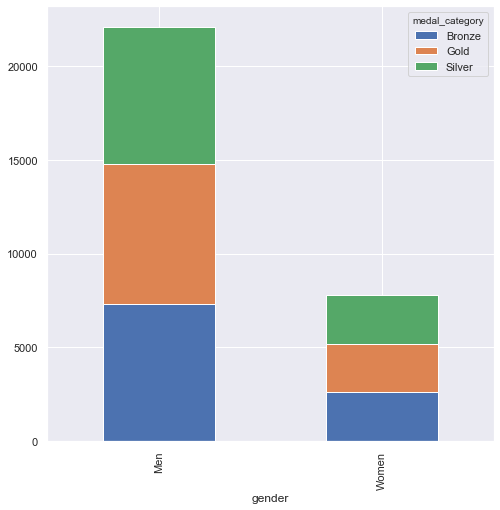

In [71]:
# Which sports types emerged and gained momentum in past of the Olympic games (in terms of medal volumes)?
clarity_color_table = pd.crosstab(index=data["gender"], 
                          columns=data["medal_category"])

clarity_color_table

clarity_color_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

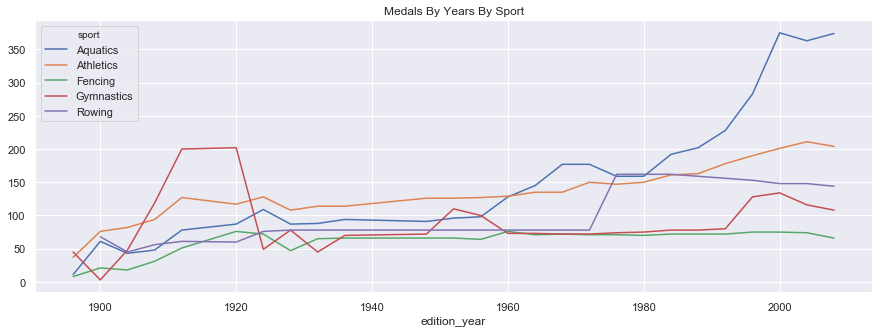

In [83]:
# How is the Medal distribution look like for the Top 5 Players (across last couple of years)
# Which sports types emerged and gained momentum in past of the Olympic games (in terms of medal volumes)? 

test1=data.groupby(['sport','edition_year'])['medal_category'].count().reset_index()
test1=test1[test1['sport'].isin(data['sport'].value_counts()[:5].index)]
test1=test1.pivot('edition_year','sport','medal_category')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(15,5)
plt.title('Medals By Years By Sport')
plt.show()

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Steep drop in Gymnastics medals is observed during 1920 </font> </i>
   - <i><font color=brown> Marginal drop is observed for fencing and rowing post 1980s</font> </i>
  </i></u></b> </font>               

Text(0.5, 1.0, 'Medals Distribution Of Top 10 Countries')

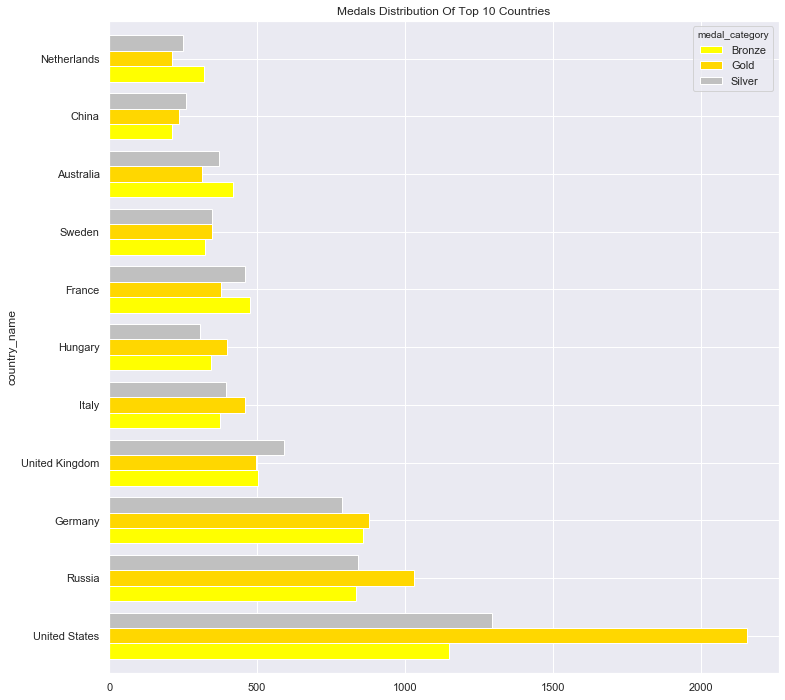

In [75]:
medals_country=data.groupby(['country_name','medal_category'])['gender'].count().reset_index().sort_values(by='gender',ascending=False)
medals_country=medals_country.pivot('country_name','medal_category','gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['yellow','gold','silver'])
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution Of Top 10 Countries')

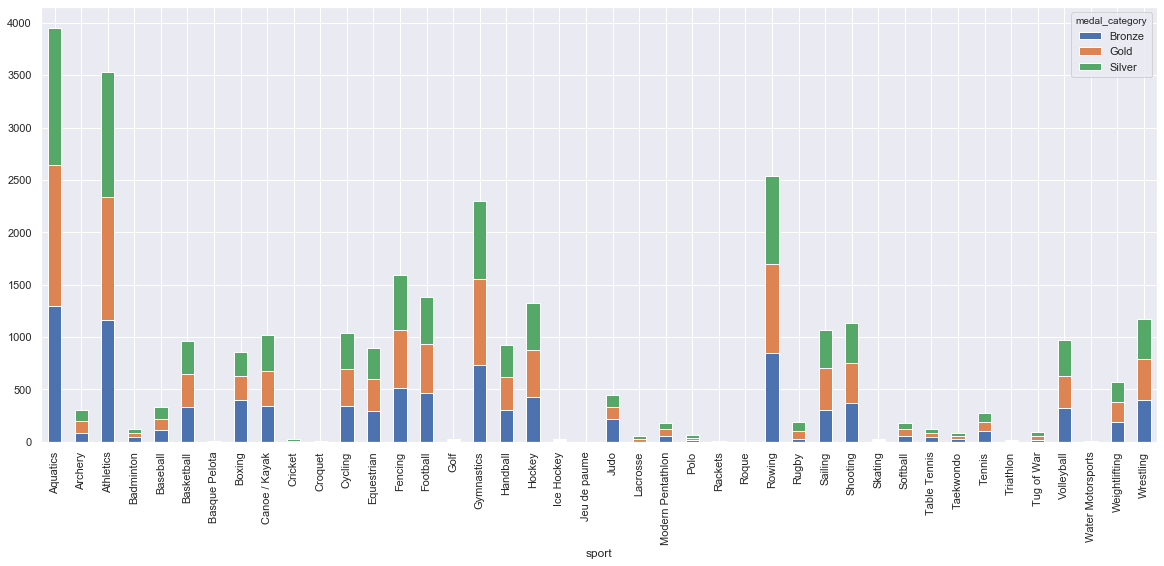

In [76]:
# Is there assymetric relationship in games in terms of medals won?
clarity_color_table = pd.crosstab(index=data["sport"],columns=data["medal_category"])
clarity_color_table  
clarity_color_table.plot(kind="bar",figsize=(20,8),stacked=True)

##### <font color=brown> <b><u><i> Key Insight:-
   - <i><font color=brown> Asymmetric medals distribution is observed in Judo and Boxing games </font> </i>
  </i></u></b> </font>               

In [77]:
data['medal'] = pd.Categorical(values=data.medal_category, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

In [78]:
data.columns

Index(['city', 'edition_year', 'sport', 'discipline', 'athlete_name', 'country_code', 'gender', 'event', 'event_gender', 'medal_category', 'country_name', 'iso_code', 'country_code', 'population_size', 'area_in_kms', 'region', 'income_group', 'gdp_usd_mm', 'medal'], dtype='object')

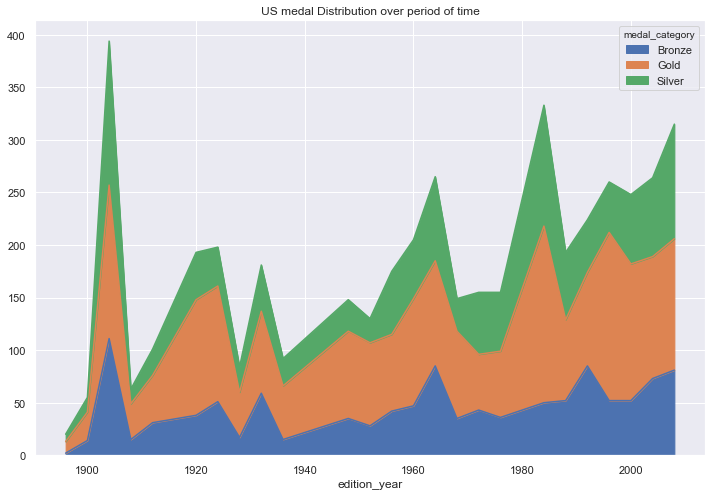

In [79]:
# Redefine 'Medal' as an ordered categorical
data.medal = pd.Categorical(values=data.medal_category, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
  
# Create the DataFrame: usa
usa = data[data.country_name == 'United States']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['edition_year', 'medal_category'])['athlete_name'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='medal_category')

# Plot the DataFrame usa_medals_by_year
usa_medals_by_year.plot.area(figsize=(12,8), title='US medal Distribution over period of time')
plt.show()  

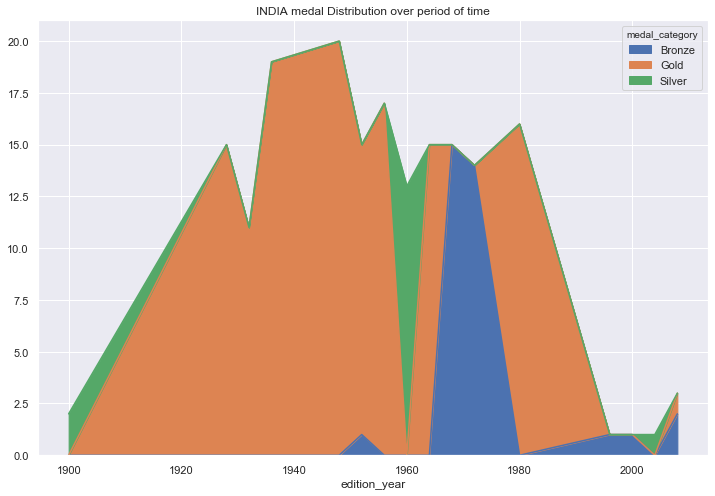

In [80]:
# Redefine 'Medal' as an ordered categorical
data.medal = pd.Categorical(values=data.medal_category, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
  
# Create the DataFrame: 
IND = data[data.country_name == 'India']

# Group India by ['Edition', 'Medal'] and aggregate over 'Athlete'
IND_medals_by_year = IND.groupby(['edition_year', 'medal_category'])['athlete_name'].count()

# Reshape usa_medals_by_year by unstacking
IND_medals_by_year = IND_medals_by_year.unstack(level='medal_category')

# Plot the DataFrame usa_medals_by_year
IND_medals_by_year.plot.area(figsize=(12,8), title='INDIA medal Distribution over period of time')
plt.show()  

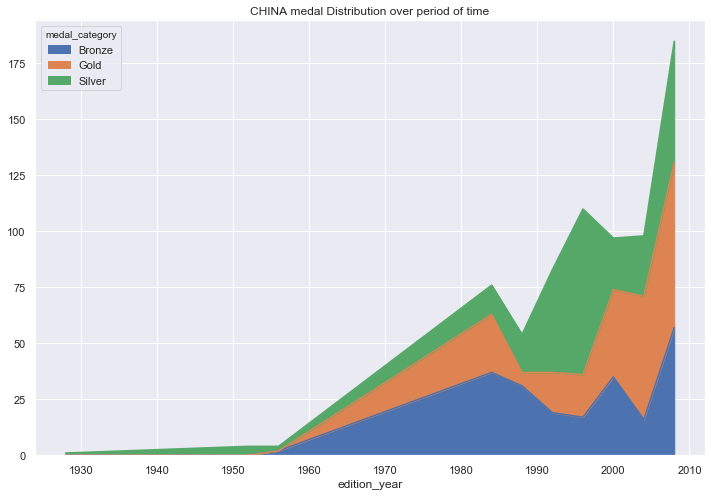

In [81]:
# Redefine 'Medal' as an ordered categorical
data.medal = pd.Categorical(values=data.medal_category, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
  
# Create the DataFrame: 
CHI = data[data.country_name == 'China']

# Group India by ['Edition', 'Medal'] and aggregate over 'Athlete'
CHI_medals_by_year = CHI.groupby(['edition_year', 'medal_category'])['athlete_name'].count()

# Reshape usa_medals_by_year by unstacking
CHI_medals_by_year = CHI_medals_by_year.unstack(level='medal_category')

# Plot the DataFrame usa_medals_by_year
CHI_medals_by_year.plot.area(figsize=(12,8), title='CHINA medal Distribution over period of time')
plt.show()  

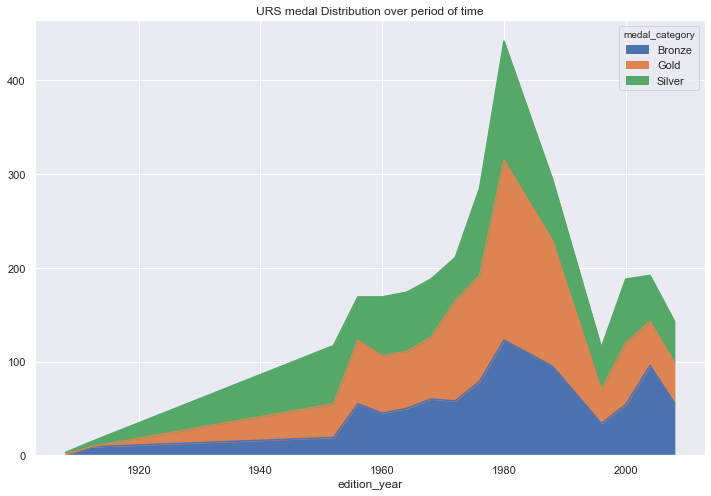

In [82]:
# Redefine 'Medal' as an ordered categorical
data.medal = pd.Categorical(values=data.medal_category, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
  
# Create the DataFrame: 
URS = data[data.country_name == 'Russia']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
URS_medals_by_year = URS.groupby(['edition_year', 'medal_category'])['athlete_name'].count()

# Reshape usa_medals_by_year by unstacking
URS_medals_by_year = URS_medals_by_year.unstack(level='medal_category')

# Plot the DataFrame usa_medals_by_year
URS_medals_by_year.plot.area(figsize=(12,8), title='URS medal Distribution over period of time')
plt.show()  

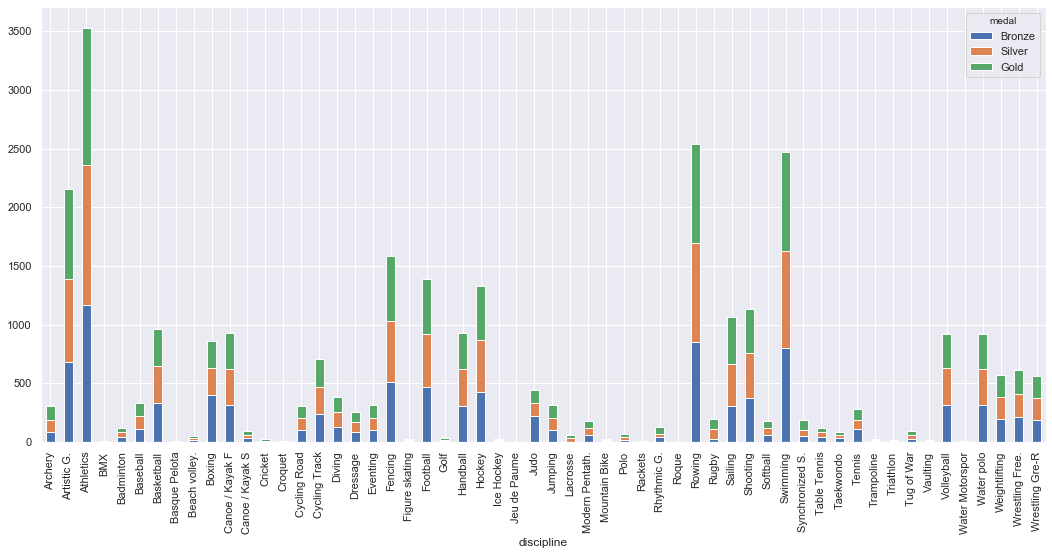

In [88]:
clarity_color_table = pd.crosstab(index=data["discipline"], 
                          columns=data["medal"])

clarity_color_table

clarity_color_table.plot(kind="bar", 
                 figsize=(18,8),
                 stacked=True)

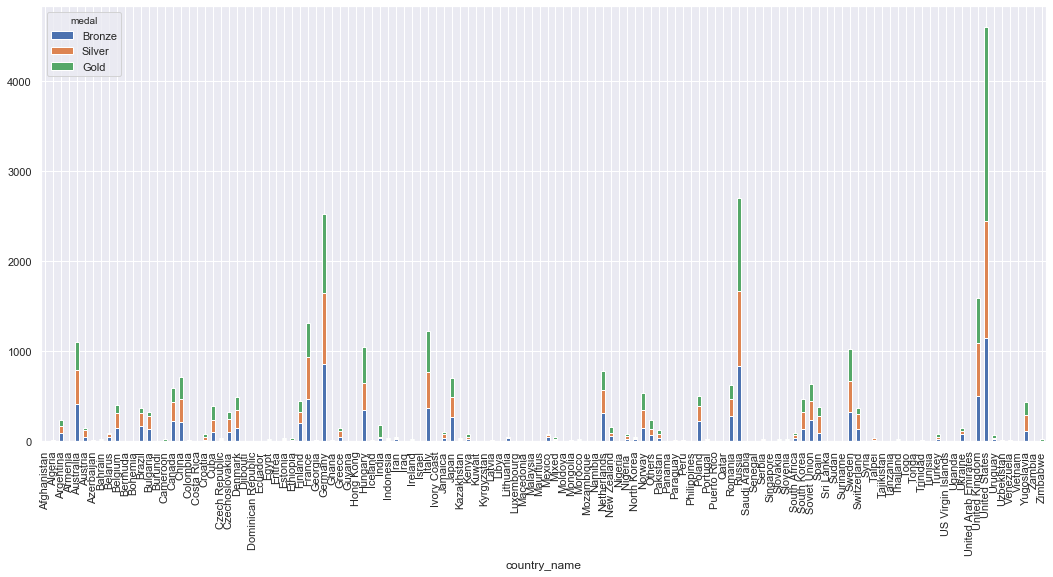

In [89]:
clarity_color_table = pd.crosstab(index=data["country_name"], 
                          columns=data["medal"])

clarity_color_table

clarity_color_table.plot(kind="bar", 
                 figsize=(18,8),
                 stacked=True)

In [90]:
### Sports & Atheletes Deep Dives

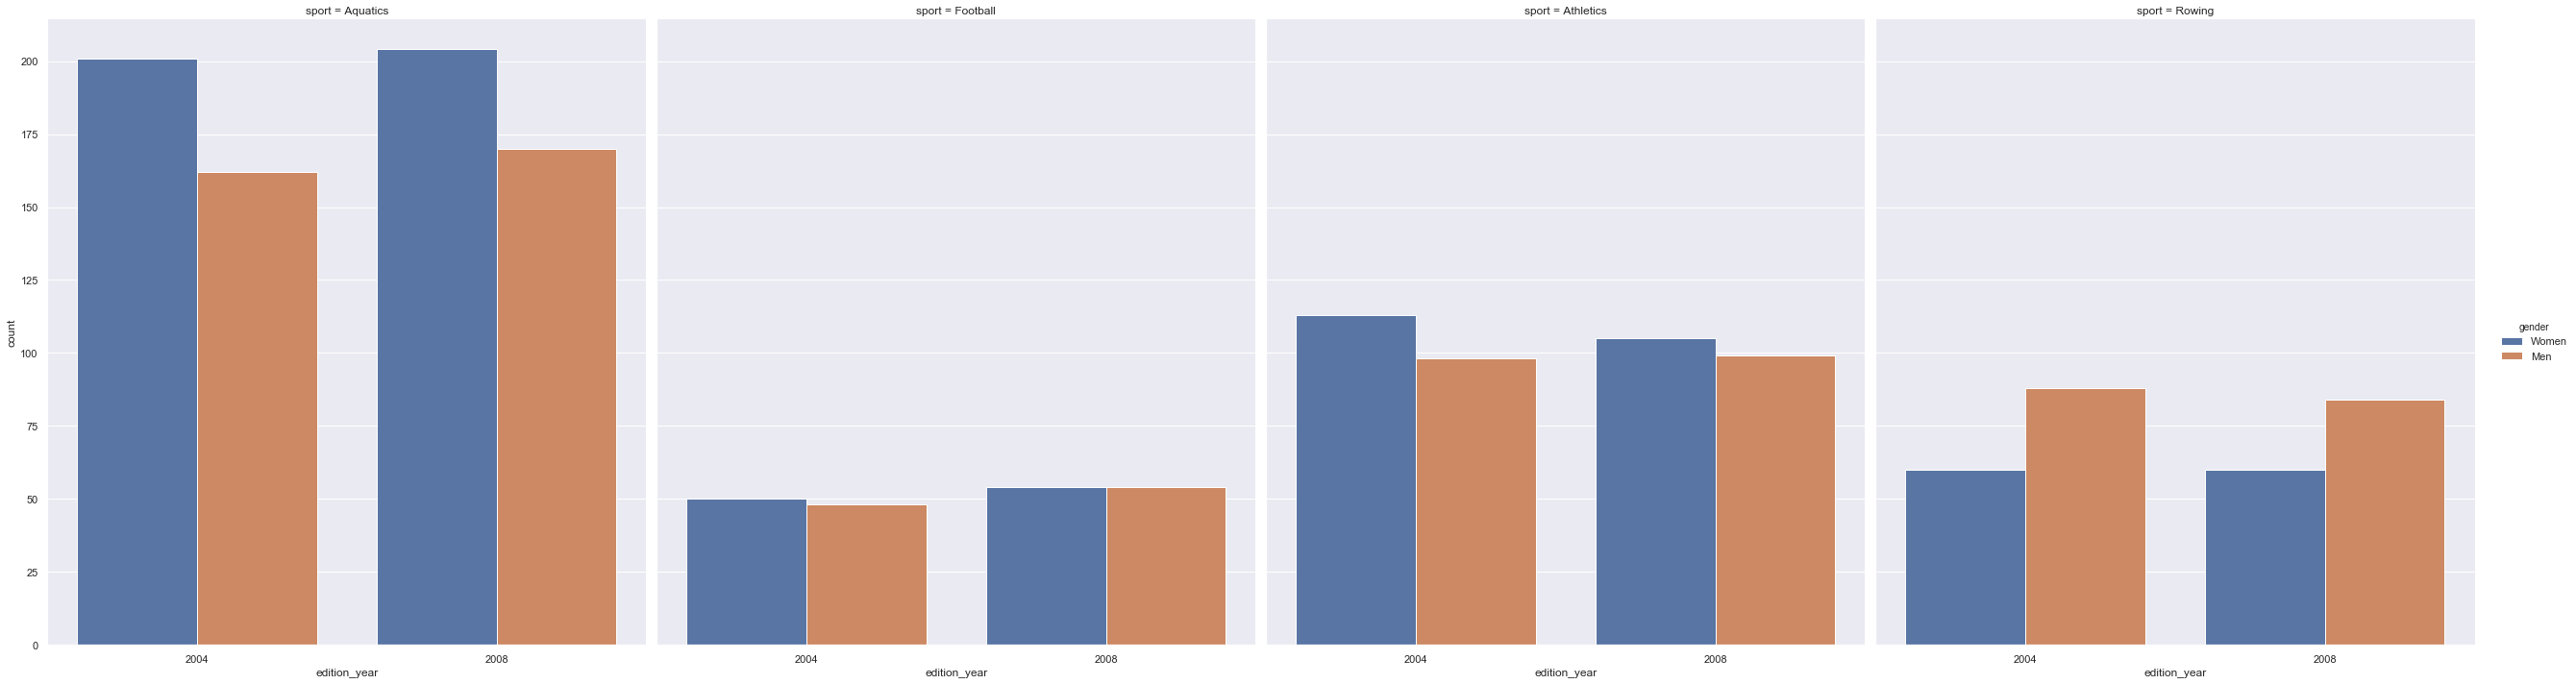

In [91]:
# Who performed better in top 3 sports (2004 vs 2008) in the last two olympics?
data1=data[data['edition_year']>=2004]         
data2=data1[data1['sport'].isin(['Aquatics','Athletics','Rowing','Football',''])]
    
g = sns.catplot(x="edition_year", hue="gender", col="sport",
                data=data2, kind="count",  
                height=10, aspect=0.9);  

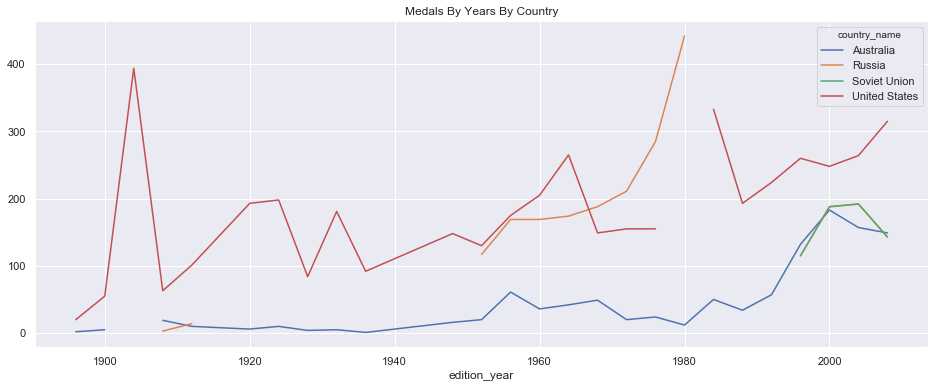

In [92]:
#Distribution of Medals for Top 5 Countries (By Years)

test1=data.groupby(['country_name','edition_year'])['medal_category'].count().reset_index()
test1=test1[test1['country_name'].isin(data1['country_name'].value_counts()[:4].index)]
test1=test1.pivot('edition_year','country_name','medal_category')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.title('Medals By Years By Country')
plt.show()

# Insights:
#The Olympic Boycott, 1980. In 1980, the United States led a boycott of the Summer Olympic Games
# in Moscow to protest the late 1979 Soviet invasion of Afghanistan

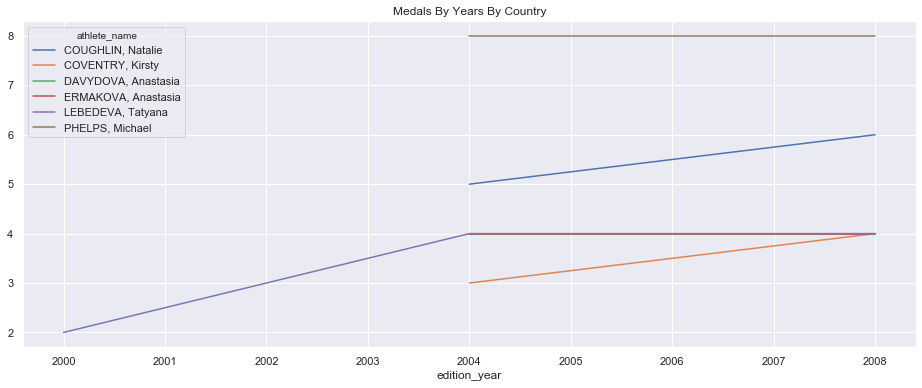

In [93]:
#data4=data[data['athelete_name'].isin(['Latynina, Larisa','Phelps, Michael','Andrianov, Nikolay'])]
    
# Medals Distribution Of Top Players By Years

test1=data.groupby(['athlete_name','edition_year'])['medal_category'].count().reset_index()
test1=test1[test1['athlete_name'].isin(data1['athlete_name'].value_counts()[:6].index)]
test1=test1.pivot('edition_year','athlete_name','medal_category')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.title('Medals By Years By Country')  
plt.show()

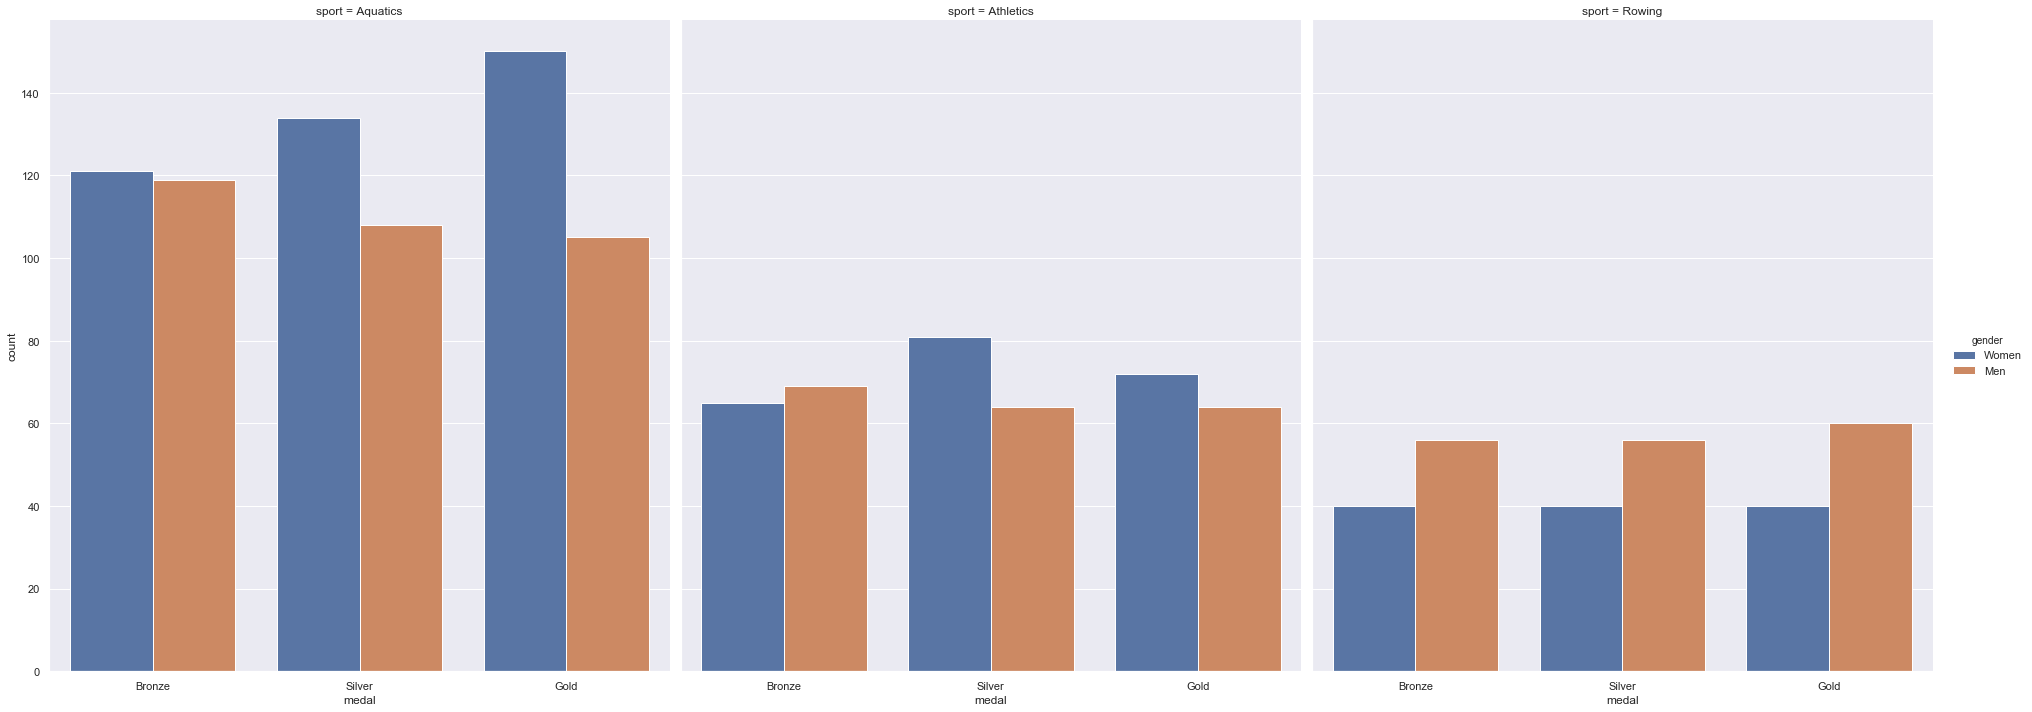

In [94]:
# Who performed better in top 3 sports in the recent years?

data1=data[data['edition_year']>=2002]         
data2=data1[data1['sport'].isin(['Aquatics','Athletics','Rowing'])]
    
g = sns.catplot(x="medal", hue="gender", col="sport",
                data=data2, kind="count",  
                height=10, aspect=0.9);  

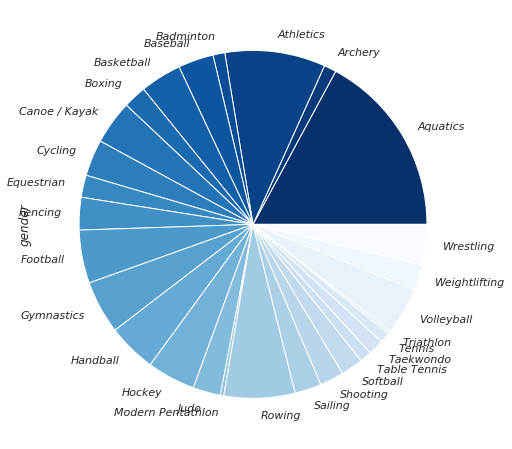

In [207]:
data1[data1['edition_year'] == 2008].groupby(['sport'])['gender'].count().plot(kind='pie',figsize=(12,8),cmap="Blues_r")

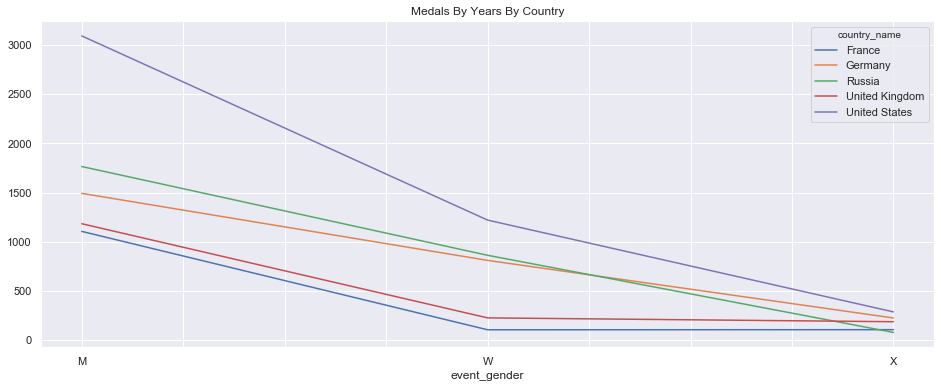

In [96]:
#Across each event category, which country outperformed others?

test1=data.groupby(['country_name','event_gender'])['medal_category'].count().reset_index()
test1=test1[test1['country_name'].isin(data['country_name'].value_counts()[:5].index)]
test1=test1.pivot('event_gender','country_name','medal_category')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.title('Medals By Years By Country')
plt.show()

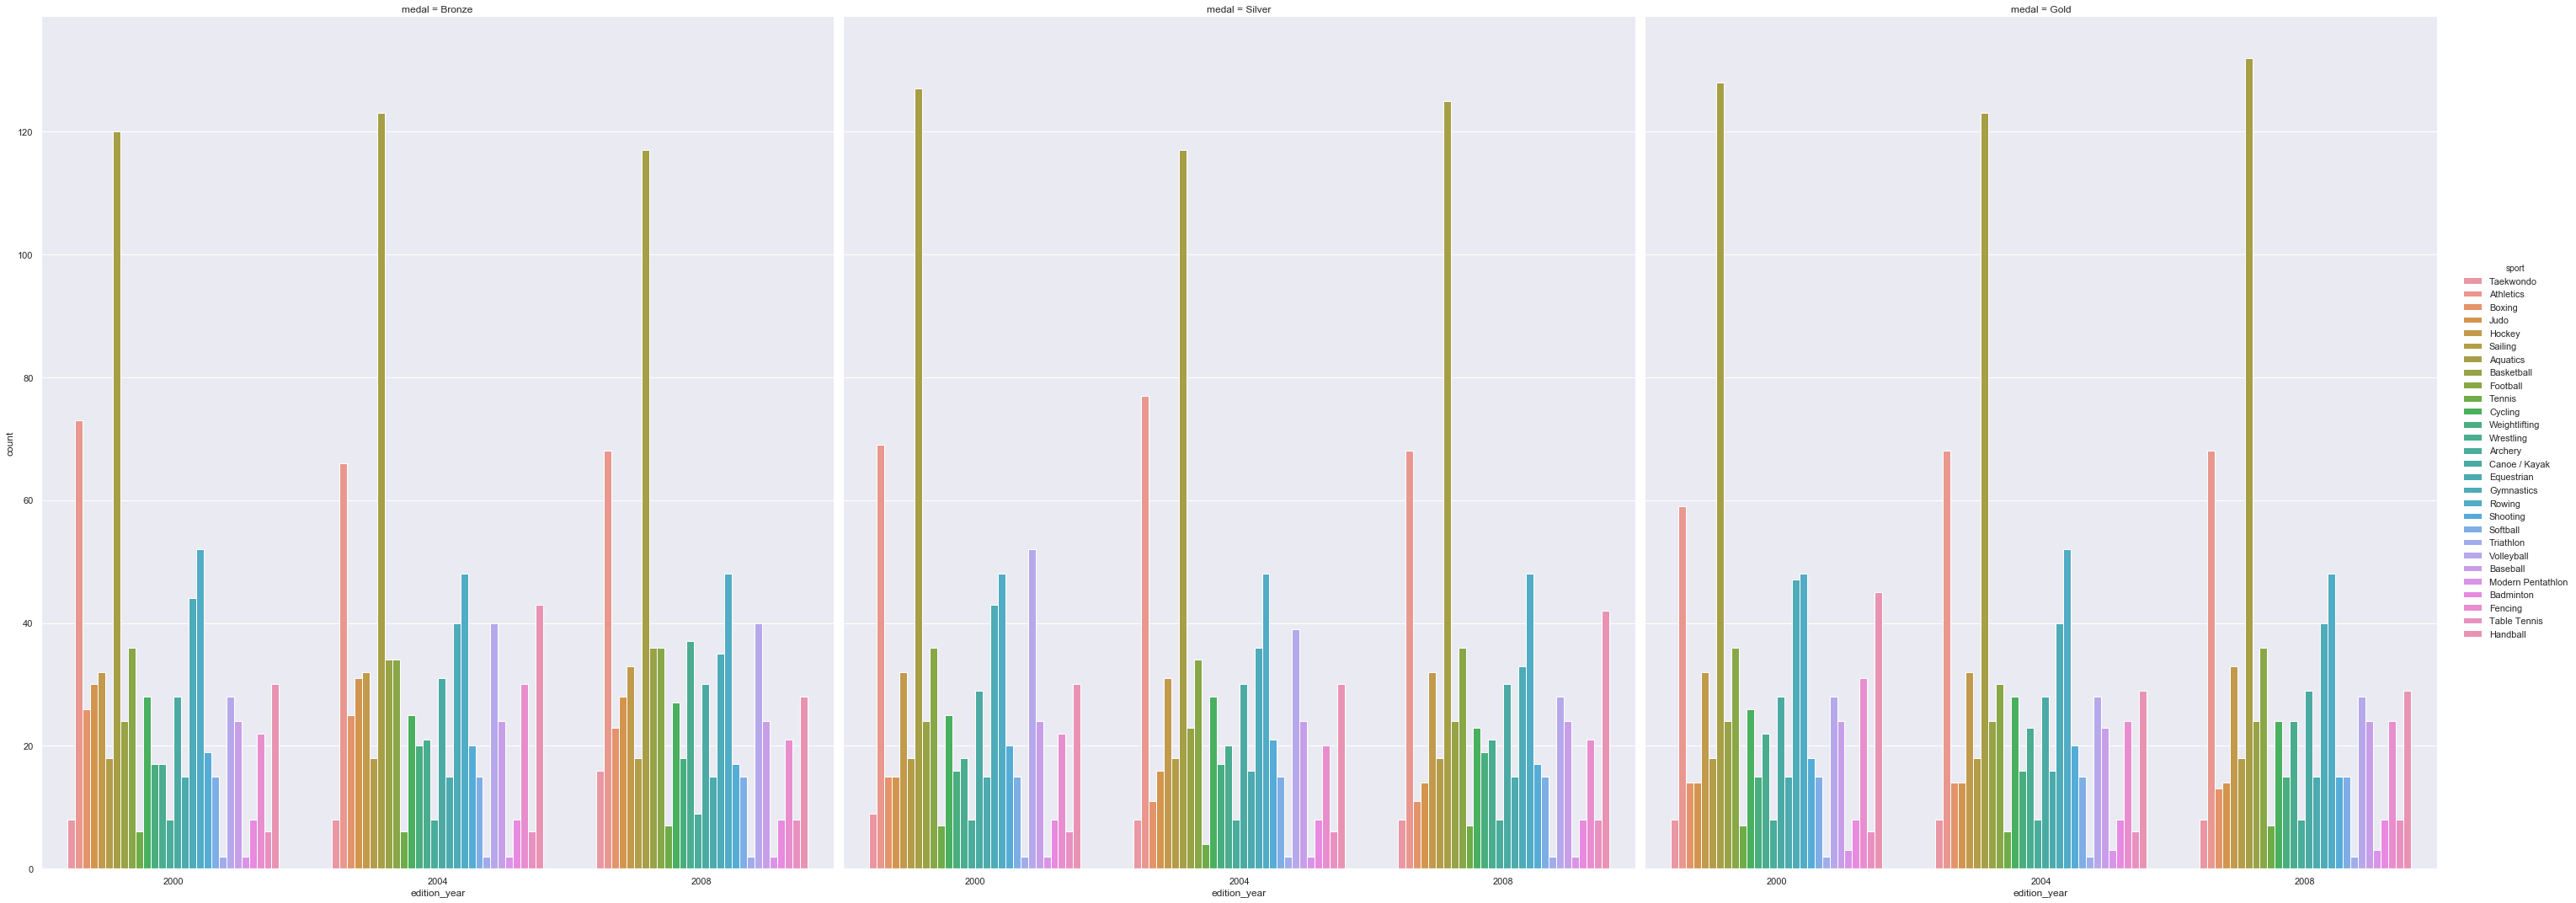

In [97]:
# How was the performance in top 5 sports in recent years?

data1=data[data['edition_year']>=2000]
g = sns.catplot(x="edition_year", hue="sport", col="medal",
                data=data1, kind="count",
                height=15, aspect=0.9);    

In [165]:
all_medals = data.groupby('edition_year')['athlete_name'].count()
all_medals.head(30) 

edition_year
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1974
2000    2202
2004    2190
2008    2185
Name: athlete_name, dtype: int64

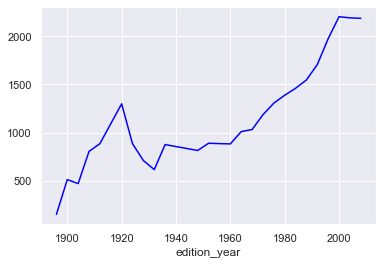

<Figure size 1080x360 with 0 Axes>

In [99]:
# How does the atheletes trend look over past couple of years?
athletes=data.groupby('edition_year')['athlete_name'].count()

athletes.plot(kind='line',color='Blue')
plt.xlabel=('Year')
plt.yabel=('No of Athletes')
plt.figure(figsize=(15,5))
plt.show()

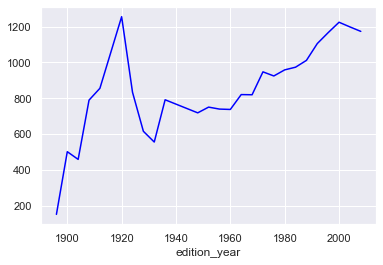

<Figure size 1080x360 with 0 Axes>

In [154]:
athletes=data[data['gender']=='Men'].groupby('edition_year')['athlete_name'].count()

athletes.plot(kind='line',color='Blue')
plt.xlabel=('Year')
plt.yabel=('No of Male Athletes')
plt.figure(figsize=(15,5))
plt.show()

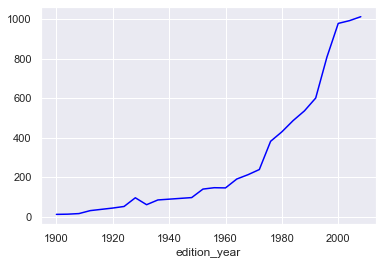

<Figure size 1080x360 with 0 Axes>

In [155]:
athletes=data[data['gender']=='Women'].groupby('edition_year')['athlete_name'].count()

athletes.plot(kind='line',color='Blue')
plt.xlabel=('Year')
plt.yabel=('No of Female Athletes')
plt.figure(figsize=(15,5))
plt.show()

In [98]:
data.columns

Index(['city', 'edition_year', 'sport', 'discipline', 'athlete_name', 'country_code', 'gender', 'event', 'event_gender', 'medal_category', 'country_name', 'iso_code', 'country_code', 'population_size', 'area_in_kms', 'region', 'income_group', 'gdp_usd_mm', 'medal'], dtype='object')

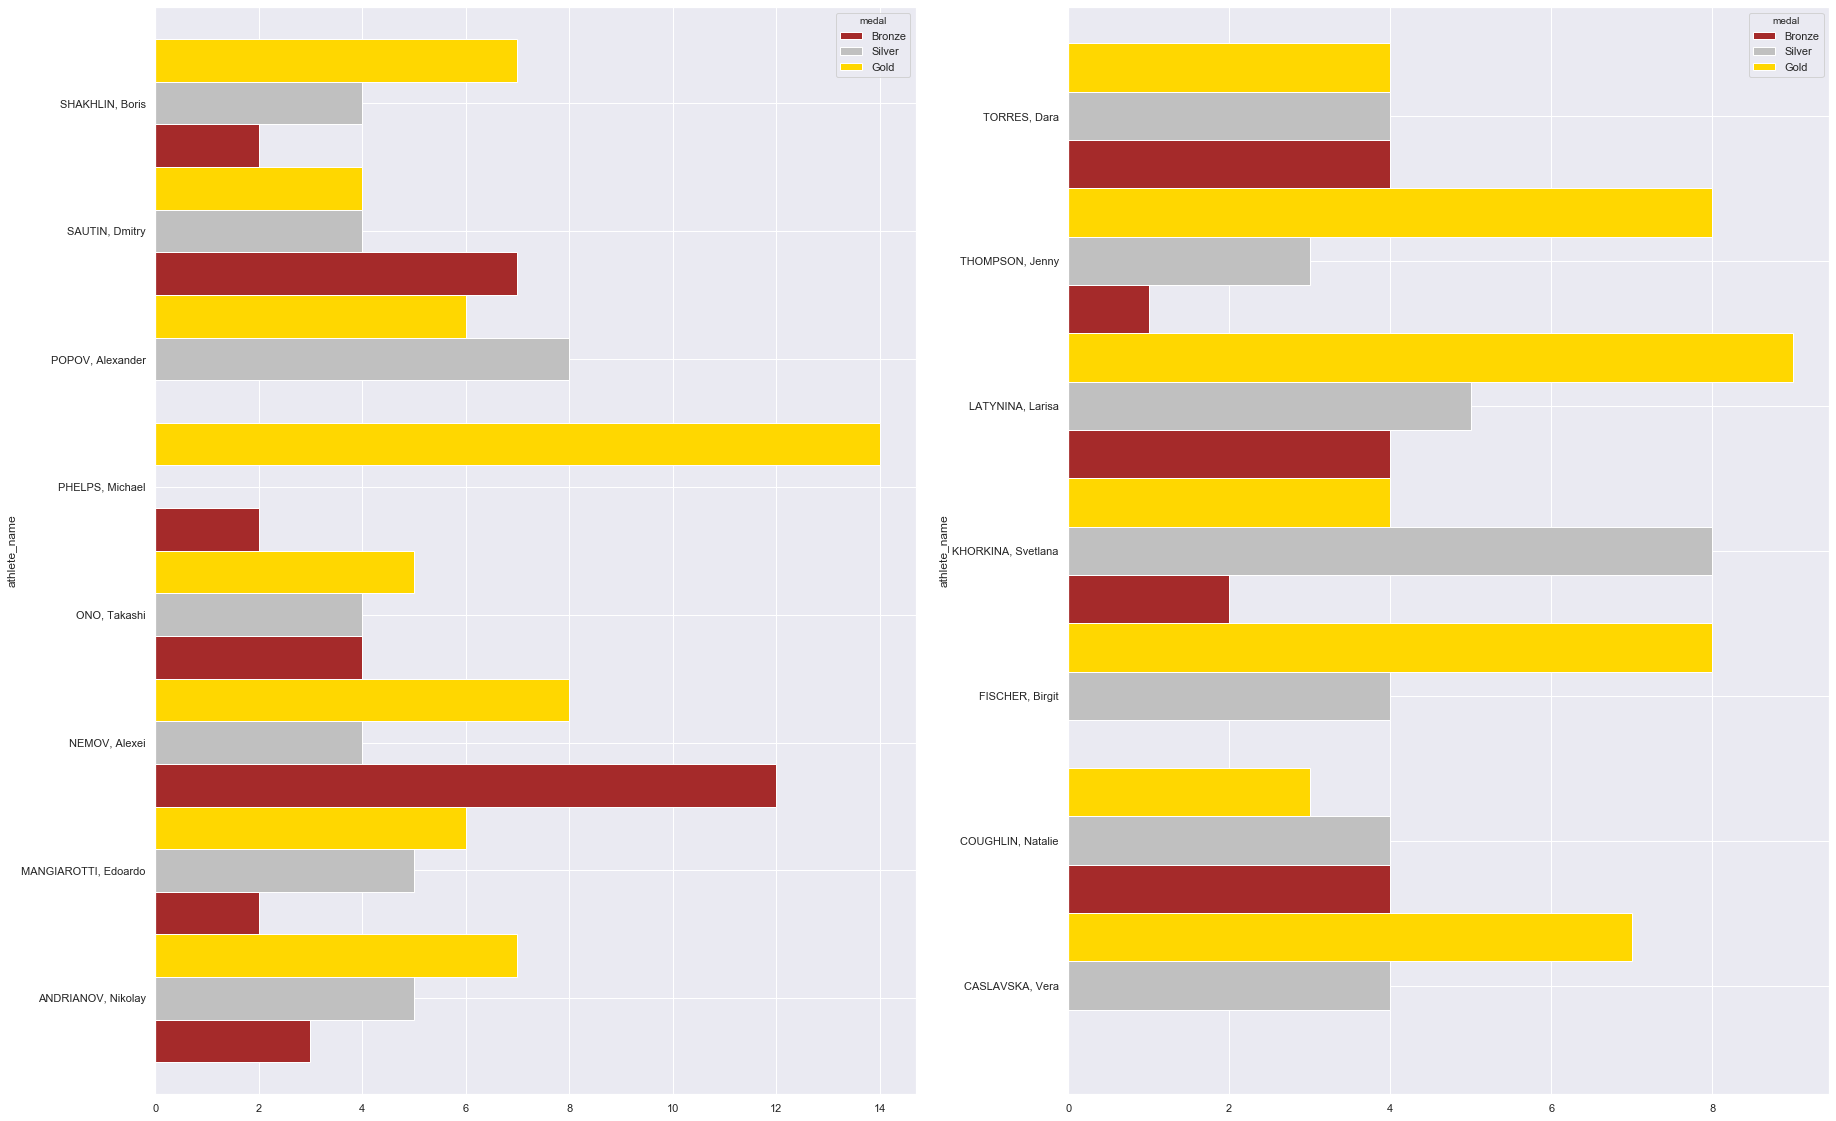

In [148]:
# Identify best performing atheletes of all times
  
fig,ax=plt.subplots(1,2,figsize=(30,20))

male_athletes=data[data['gender']=='Men']
male_athletes=male_athletes.groupby(['athlete_name','medal'])['country_name'].count().reset_index().sort_values(by='country_name',ascending=False)
male_athletes=male_athletes[male_athletes['athlete_name'].isin(data['athlete_name'].value_counts().index[:10])]
male_athletes=male_athletes.pivot('athlete_name','medal','country_name')
male_athletes.plot.barh(ax=ax[0], width=1,color=['brown','silver','gold'])

women_athletes=data[data['gender']=='Women']
women_athletes=women_athletes.groupby(['athlete_name','medal'])['country_name'].count().reset_index().sort_values(by='country_name',ascending=False)
women_athletes=women_athletes[women_athletes['athlete_name'].isin(data['athlete_name'].value_counts().index[:20])]
women_athletes=women_athletes.pivot('athlete_name','medal','country_name')
women_athletes.plot.barh(ax=ax[1], width=1,color=['brown','silver','gold'])